# Introduction to Machine Learning

**In this practical session you will:**

   - Learn the essential idea behind Machine Learning including several statistical concepts and the implementation steps under the point of view of the Data Science cycle.
   - Download, explore and implement the preliminary processing of a multi-omics cancer dataset that will be used throughout the course.

## Definition:

Machine learning is a subfield of artificial intelligence (AI) that focuses on developing algorithms and models that allow computers to learn patterns and make predictions or decisions without being explicitly programmed. In the context of data science and mathematical modeling, machine learning plays a crucial role in building models that represent real-world systems using mathematical concepts and language. A subfield of Machine learning is Deep learning, which uses a type of models called neural networks that are inspired in the architechture of human brains.

[![AI diagram](http://danieljhand.com/images/AI_ML_DL_circles.jpeg)](http://danieljhand.com/the-relationship-between-artificial-intelligence-ai-machine-learning-ml-and-deep-learning-dl.html)



## Characteristics of Machine Learning:

1. **Learning from Data:**
   - Machine learning systems learn from data rather than relying on explicit programming by using some statistical techniques.
   - Algorithms use available data to identify patterns, relationships, and trends.

<!-- Add an empty line here -->

2. **Model Development:**
   - Machine learning involves creating models that can generalize patterns from the training data to make predictions or decisions on new, unseen data.

<!-- Add an empty line here -->

3. **Adaptability:**
   - Machine learning models can adapt and evolve as new data becomes available, making them suitable for dynamic and changing environments.

<!-- Add an empty line here -->

## Data Science Lifecycle:

The data science lifecycle involves several key steps that machine learning implementations follows:

<!-- Add an empty line here -->

1. **Identification of the problem:**
   - Allows the decision on the suitable model and algorithm and definition of training and test datasets.

<!-- Add an empty line here -->

2. **Data Collection:**
   - Gather relevant data from various sources, ensuring it is representative and suitable for the problem at hand.
   - It is highly important to perform exploratory analysis to evaluate the quality of the data and, if suitable, define the subsequent necessary processing steps.

<!-- Add an empty line here -->

3. **Data Processing:** This is probably the most relevant step: independently of a succesful implementation of the previous steps, if the data does not contain the information relevant to solve the problem and or present in an inadequate state for the algorithm to learn from, the resulting model will be useless (garbage-in -> garbage-out). It mainly consists of two steps.

    3.1. **Data Pre-processing:**
    - Clean and preprocess the data to handle missing values, outliers, and format issues.

    <!-- Add an empty line here -->

    3.2. **Feature Engineering:**
    - Necessary in some cases but optional in others.
    - Select or create features that are relevant and informative for the machine learning model.
    - Common approaches are grouped into *Filter-based*, *Wrapper-based* and *Embedded-based* categories.
   
<!-- Add an empty line here -->

4. **Data modelling:** During this iterative process, each model's performance is assessed using different metrics depending if the algorithm works with categorical or continous variables.

    <!-- Add an empty line here -->

    4.1. **Model Training:**
    - Use a learning algorithm to train the model on a labeled dataset, allowing it to learn patterns and relationships.

    <!-- Add an empty line here -->

    4.2. **Model Optimization:**
    - Adjust model parameters and features to improve performance, often involving techniques like hyperparameter tuning. Within this step it is important to avoid overfitting (the model could be generalized to datasets beyond the training ones).

    <!-- Add an empty line here -->

    4.3. **Model Testing:**
    - Validate the model on new, unseen data to ensure it generalizes well (without overfitting) and provides accurate predictions (without underfitting).

<!-- Add an empty line here -->

5. **Deployment:**
   - Deploy the model into a real-world environment, integrating it into decision-making processes.

<!-- Add an empty line here -->

[![Data Science LyfeCycle](https://www.onlinemanipal.com/wp-content/uploads/2022/09/Data-Science-Life-cycle-768x767.png.webp)](https://www.onlinemanipal.com/blogs/data-science-lifecycle-explained)

## Types of Machine Learning

Machine learning is broadly categorized into several types, each serving different purposes and solving distinct problems. Here are the main types:

<!-- Add an empty line here -->

[![AI diagram](https://www.freecodecamp.org/news/content/images/2020/08/ml-1.png)](https://www.freecodecamp.org/news/machine-learning-for-managers-what-you-need-to-know/)

<!-- Add an empty line here -->

### Supervised Learning

In supervised learning, the algorithm is trained on a **labeled** dataset, where each input is paired with the corresponding output. The goal is to learn a mapping from inputs to outputs, and hence, **predict an output based on input**.

The usefulness of these models is evaluated immediately since both the input and corresponding correct outputs are provided in the testing dataset.


**a. Regression:**
   - **Objective:** Predict a continuous target variable.
   - **Examples:** Linear Regression, Polynomial Regression.

**b. Classification:**
   - **Objective:** Predict a discrete target variable (class labels).
   - **Examples:** Logistic Regression, Decision Trees or Random Forest and Support Vector Machines.

<!-- Add an empty line here -->

### Unsupervised Learning

Unsupervised learning involves training on **unlabeled** data, and the algorithm tries to **discover patterns or relationships in the data** without explicit guidance on the output.

Since the output is unknown in the training data, the usefulness is implicitly derived from the structure and relationships discovered in the data.

**a. Clustering:**
   - **Objective:** Group similar data points together.
   - **Examples:** K-Means Clustering, Hierarchical Clustering.

**b. Dimensionality Reduction:**
   - **Objective:** Reduce the number of input features while preserving important information. It is also commonly used as a pre-processing step for feature extraction.
   - **Examples:** Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE).

**c. Association Rule Learning:** It will not be covered on this course.
   - **Objective:** Discover interesting relationships between variables in large datasets.
   - **Examples:** Apriori Algorithm, Eclat Algorithm.


### Reinforcement Learning

Reinforcement learning involves an **agent interacting with an environment**, learning to make decisions by receiving feedback in the form of rewards or penalties (mimics the human trial and error behaviour). Hence, the objective is to **learn a policy to make decisions achieving the most optimal result**.

On this type of algorithms, the performance depends on the environment provided by the agent (reward or penalty) after each action, guiding it towards learning a successful policy for optimization (https://www.youtube.com/@aiwarehouse). It is usually employed for training AI for videogames rather than on -omics data analysis, so it won't be covered on this course.

**a. Model-Based Reinforcement Learning:**

   - **Objective:** Build an explicit model of the environment to make decisions.
   - **Examples:** Monte Carlo Tree Search.

**b. Model-Free Reinforcement Learning:**

   - **Objective:** Learn to make decisions without an explicit model of the environment.
   - **Examples:** Q-Learning, Deep Q Network (DQN).

## Relationship with Statistical Concepts

1. **Pattern Recognition:**
   - Machine learning involves finding patterns in data, a concept deeply rooted in statistics.
   - Depeding on the types of problem, and hence, the employed algorithm, different kinds of patterns can be extracted from data.

<!-- Add an empty line here -->

[![Pattern types](https://www.researchgate.net/profile/Gordon-Elger/publication/352727978/figure/fig2/AS:1153327744192512@1651986170131/Machine-learning-tasks-most-relevant-for-PdM.png)](https://www.researchgate.net/figure/Machine-learning-tasks-most-relevant-for-PdM_fig2_352727978)

<!-- Add an empty line here -->

2. **Cross-Validation:** A key concept for supervised models when the available dataset is smaller than the optimal for the validation purposes.
   - To assess a supervised model's generalization ability, cross-validation techniques are used to evaluate performance on multiple subsets of the data.
   - There are multiple methodologies (https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations) although the most common is the **K-fold cross-validation** which involves partitioning the entire dataset into k number of random subsets, where k-1 are used for training and 1 for testing purposes. This is repeated for a number of iterations and the model is evaluated through the metrics obtained across interations.

<!-- Add an empty line here -->

[![Bias and Variance](https://d2mk45aasx86xg.cloudfront.net/image5_11zon_af97fe4b03.webp)](https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations) 

<!-- Add an empty line here -->

3. **Bias-Variance Tradeoff:** Also a key concept when dealing with supervised models.
   - In statistics, the bias of an estimator is the difference between this estimator’s expected value and the true value of the parameter being estimated. On the other hand, the variance of an estimator measures how much the estimates from the estimator are likely to vary or spread out around the true, unknown parameter, through repeated sampling.

<!-- Add an empty line here -->

   [![Bias and Variance](https://nvsyashwanth.github.io/machinelearningmaster/assets/images/bias_variance.jpg)](https://nvsyashwanth.github.io/machinelearningmaster/bias-variance/)

<!-- Add an empty line here -->

   - If we consider Machine learning predictions as estimations these two concepts acquire the following meaning in this context. 
       
       - **Variance** is the consistency of the model predictions for a particular sample instance (for instance applying the model multiple times on subsets of the training dataset). In other words, is the sensitivity of the model to the randomness of the training dataset.
       
       - In contrast, **Bias** could be seen as the measure of the distance between predictions and the correct values (the labels) if we rebuild the model multiple times with different training datasets. Therefore, is the measure of the systematic error not due to randomness in the training data.
             
   - These two concepts are intrinsically related, and therefore, the bias-variance tradeoff is a fundamental concept in machine learning: there is an optimal model complexity that allows for good performance on the training data but still keeping the ability to generalize to new data. Deviations from these optimal area leads to either high bias (underfitting, there is still room to improve the model though training) or high variance (overfitting, excessive training on a specific dataset and unable to generalize to similar test datasets) of the model.
   
   <!-- Add an empty line here -->

   [![Optimal complexity](https://ejenner.com/post/bias-variance-tradeoff/tradeoff_huad58a1a719791584e96223cc1385b715_74447_1200x1200_fit_q75_h2_lanczos_3.webp)](https://ejenner.com/post/bias-variance-tradeoff/)
   
<!-- Add an empty line here -->

   [![Underfitting and overfitting](https://www.endtoend.ai/assets/blog/misc/bias-variance-tradeoff-in-reinforcement-learning/underfit_right_overfit.png)](https://www.endtoend.ai/blog/bias-variance-tradeoff-in-reinforcement-learning/)

<!-- Add an empty line here -->

4. **Statistical Metrics:**
   - Various statistical metrics are used to quantify the performance of both unsupervised, and mostly, supervised machine learning models.
   - The type of metric used is related with the type of problem/algorithm used.
   
   <!-- Add an empty line here -->
   
   [![Supervised metrics](https://www.kdnuggets.com/wp-content/uploads/anello_machine_learning_evaluation_metrics_theory_overview_11.png)](https://www.kdnuggets.com/machine-learning-evaluation-metrics-theory-and-overview)

## Case of use: Cancer genomics

Cancer is a group of diseases involving abnormal cell growth with the potential to invade or spread to other parts of the body. At the very core of the etiology of cancer is somatic mutations: permanent alterations in the genetic material (either resulting from spontaneous errors during the DNA replication or as a result of DNA damage) originated throughout the somatic development (from the very first mitotic divisions of the Zygot to the human adult tissues).

As sequencing technologies advanced in the past decade, the number of available tumoral whole genomes have increased exponentially, revealing that different tumors accumulate mutations with a variability of up to three orders of magnitude.

<!-- Add an empty line here -->

![ICGC TMB](images/ICGC_muts.png)

<!-- Add an empty line here -->

Not only the total number of mutation varies, but also the composition. The endogenous mutational processes active in a tissue as well as the mutagens a person has been exposed during their lifetime, e.g ultraviolet (UV)-light or tobacco smoking, define a set of probabilities for each nucleotide to mutate provided of its neighboring
sequence. These probabilities can be inferred can be decomposed from the observed data into several
components that roughly reflect the individual mutational processes affecting the cell, the so-called ‘mutation signatures’, some linked to specific mechanisms.

<!-- Add an empty line here -->

<!-- Add an empty line here -->

**Tobacco-related signature of single base substitutions (SBS) 4**

<!-- Add an empty line here -->

[![Tobacco Signature](https://cog.sanger.ac.uk/cosmic-signatures-production/images/v2_signature_profile_4.original.png)](https://cancer.sanger.ac.uk/signatures/signatures_v2/)

<!-- Add an empty line here -->

<!-- Add an empty line here -->

**Ultraviolet light-related signature of single base substitutions (SBS) 7**

<!-- Add an empty line here -->

[![Tobacco Signature](https://cog.sanger.ac.uk/cosmic-signatures-production/images/v2_signature_profile_7.original.png)](https://cancer.sanger.ac.uk/signatures/signatures_v2/)

<!-- Add an empty line here -->

<!-- Add an empty line here -->

Hence, the study of mutations within the Cancer Genomics field, integrated with other -omic data such as transcriptomics or epigenomics as well as clinical data has paved the latest advances in Cancer Research.

Several international consortium have generated multi-omic cancer datasets. One of them, enmarked within The Cancer Genome Atlas (TCGA) is the Pan Cancer Analysis of Whole Genomes (PCAWG) initiative. Public available data is stored at the International Cancer Genome Consortium (ICGC) database: https://dcc.icgc.org/releases/PCAWG

Some files are particularly interesting for analysis with Machine Learning techniques:

- Clinical (phenotypical) information for each donor belonging to given project, contained at **pcawg_donor_clinical_August2016_v9.xlsx** file. Here you have relevant information such as the donor sex, the vital status, the treatment, the age at diagnosis and the history of smoking and alcohol habits.
- Relationship between donor, specimen and sample identifications at **pcawg_sample_sheet.tsv** file. A donor is the individual with cancer, where several specimens (biopsies of tumor or healthy tissue) can be collected. Moreover, from these specimens more than one samples could be collected to extract omics information (WGS, RNA-seq,...).
- A matrix with the expression in transcript per millions (TPMs) for multiple genes across several samples. This information is contained at **pcawg.rnaseq.transcript.expr.tpm.tsv.gz**.
<!-- - A list of known detected driver mutations on samples, contained at **TableS3_panorama_driver_mutations_ICGC_samples.public.tsv.gz**. -->
- A matrix of the proportion of mutations attributed to a given mutation signature across specimens with Signature Analyzer. The data is contained at the **SignatureAnalyzer_COMPOSITE.SBS.txt** file.

In [8]:
# We can start by downloading some files, for that we will need the pandas package
import pandas as pd

# We will also need numpy for some operations
import numpy as np

# Os is a basic python integrated library. The path utilities are useful to work with local files
from os import path

# To explore the datasets it is always useful to use some plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# Some dependencies on the seaborn package will generate warnings due to the version. Just ignore them
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# The clinical information of the donors
## It is an excel file, so we use the function read_excel from pandas
clinical_df = pd.read_excel('https://dcc.icgc.org/api/v1/download?fn=/PCAWG/clinical_and_histology/pcawg_donor_clinical_August2016_v9.xlsx')
clinical_df

In [ ]:
# For starters we can explore both of these files.
## The clinical information for donors contains mostly categorical variables but others such as the patient age at diagnosis is continous
## Moreover, it seems there are a lot of missing data. Let's explore it.

categorical_columns = ['project_code', 'donor_sex', 'donor_vital_status', 'first_therapy_type', 'first_therapy_response',
                        'tobacco_smoking_history_indicator', 'alcohol_history', 'alcohol_history_intensity']

continuous_columns = ['donor_age_at_diagnosis', 'tobacco_smoking_intensity', 'donor_survival_time', 'donor_interval_of_last_followup']

# Create a list of tuples indicating whether each column is categorical or continuous
column_types = [(col, 'categorical') if col in categorical_columns else (col, 'continuous') for col in categorical_columns + continuous_columns]

n_rows = 4
n_cols = (len(categorical_columns)+len(continuous_columns))//n_rows

# Create a figure with multiple subplots (make a grid, 4 rows, 3 columns)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(13, 16))

for i, tupl in enumerate(column_types):
    col = tupl[0]
    cat = tupl[1]
    if cat == 'categorical':
        clinical_df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i//n_cols, i%n_cols], startangle=90)
        axes[i//n_cols, i%n_cols].set_title(f'Pie Chart - {col}')
        axes[i//n_cols, i%n_cols].set_ylabel('')
    elif cat == 'continuous':
        sns.histplot(clinical_df[col], bins=20, kde=True, ax=axes[i//n_cols, i%n_cols])
        axes[i//n_cols, i%n_cols].set_title(f'Histogram - {col}')
        axes[i//n_cols, i%n_cols].set_xlabel(col)
        axes[i//n_cols, i%n_cols].set_ylabel('Frequency')

plt.show()

In [ ]:
# Notice the warnings, the code ignores on the categorical plots the Non-Available data. Let's plot it with dropna=False on the value_counts() function
# Create a figure with multiple subplots (make a grid, 4 rows, 3 columns)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(13, 16))

for i, tupl in enumerate(column_types):
    col = tupl[0]
    cat = tupl[1]
    if cat == 'categorical':
        clinical_df[col].value_counts(dropna=False).plot.pie(autopct='%1.1f%%', ax=axes[i//n_cols, i%n_cols], startangle=90)
        axes[i//n_cols, i%n_cols].set_title(f'Pie Chart - {col}')
        axes[i//n_cols, i%n_cols].set_ylabel('')
    elif cat == 'continuous':
        sns.histplot(clinical_df[col], bins=20, kde=True, ax=axes[i//n_cols, i%n_cols])
        axes[i//n_cols, i%n_cols].set_title(f'Histogram - {col}')
        axes[i//n_cols, i%n_cols].set_xlabel(col)
        axes[i//n_cols, i%n_cols].set_ylabel('Frequency')

# Save the figure for future uses
plt.savefig(path.join('plots', 'Clinical_withNA.png'))
plt.show()

Notice that know except for the sex and vital status categories, the NA category nan from numpy is the most common category across the information on the patients. This is going to complicate analysis using this clinical phenotypical data.

In [ ]:
## Save it on the data folder for later uses.
clinical_df.to_csv(path.join('data', 'clinical_df.tsv'), sep='\t', index=False)

Now we can download the file with relation of specimens and samples extracted from each donor. It is just a file that helps connect by IDs other files, so let's have a quick look.

In [ ]:
## It is a tabular separated file, so we read with the read_csv function specifying the tabulator \t as the separator character
## Moreover, we indicate that the file has a header that should be inferred as the column names.
sample_df = pd.read_csv('https://dcc.icgc.org/api/v1/download?fn=/PCAWG/donors_and_biospecimens/pcawg_sample_sheet.tsv', sep='\t', header='infer')
sample_df

Note that for the same donor, several specimens are extracted. Usually, one from a normal tissue and another from a primary tumor (to find mutations through WGS it is necessary to remove germline mutations that are present on both normal and tumoral tissue, that is why the mutations found on normal tissues are usually substracted from the tumor mutation calls).

Moreover, notice that from the same tumoral specimen several samples might be extracted to extract information with different techniques: in this case for WGS or for RNA-seq. This will be relevant to map multiomic information across samples from the same tumoral specimen from a given donor.

In [ ]:
# Merge it with a file provided in the data folder to extract the primary site
project_info = pd.read_csv(path.join('data', 'projects_PCAWG_info.txt'), sep='\t', header='infer')

primary_location_dict = dict(zip(project_info.project, project_info.primary_location))

sample_df['primary_location'] = sample_df['dcc_project_code'].map(primary_location_dict)

# Save it on the data folder for later uses
sample_df.to_csv(path.join('data', 'sample_df.tsv'), sep='\t', index=False)

Next, the expression data is downloaded. This is a very large file and using pandas function will take time. As a simple alternative, you can download it directly with your browser into the data folder: https://dcc.icgc.org/api/v1/download?fn=/PCAWG/transcriptome/transcript_expression/pcawg.rnaseq.transcript.expr.tpm.tsv.gz

In [ ]:
# Load the expression data
expression_df = pd.read_csv(path.join('data', 'pcawg.rnaseq.transcript.expr.tpm.tsv.gz'), sep='\t', header='infer', compression='gzip')
expression_df

Here the first column shows a the Ensembl Transcript ID and the rest of the columns, whose name is the aliquot ID (present at the **pcawg_sample_sheet.tsv** file).

If we want to add gene IDs or Symbols instead of transcript IDs, we will need to process the file that the PCAWG consortium uses for annotation, located at: https://dcc.icgc.org/api/v1/download?fn=/PCAWG/drivers/expression/rnaseq.gc19_extNc.gtf.tar.gz

Another alternative than using the browser is to use a bash script. In Jupyter notebooks, you can use other interpreters rather than python. The script below is able to download and process the necessary file (If you don't have a linux-based operative system, skip this step. The file is already provided in the data folder).

In [ ]:
%%bash
# The %% above indicates to the jupyter notebook to use bash as interpreter

# Change into the data directory
cd data

# Download the file from the ICGC
wget -O rnaseq.gc19_extNc.gtf.tar.gz https://dcc.icgc.org/api/v1/download?fn=/PCAWG/drivers/expression/rnaseq.gc19_extNc.gtf.tar.gz

# Process the file using a bash code
zcat rnaseq.gc19_extNc.gtf.tar.gz | cut -f9 | cut -d';' -f2 | sed 's/.*gencode::\([^:]*\)::tc_\([^._]*\)[^:]*::\([^._]*\)[^:]*.*/\1\t\2\t\3/' | sort | uniq | tail -n +3 | gzip > gencode_transcript.tsv.gz

Summarizing until here we have:

**pcawg.rnaseq.transcript.expr.tpm.tsv.gz**: A large file with the first column being the ensembl Transcript ID and the rest of the columns with an aliquot ID.

**sample_df.tsv**: A file that contains the relationship between donors, specimens and samples. The aliquotID is also a column of this file.

**gencode_transcript.tsv.gz**: A file that contains the transcript information.

For the analysis at the following sessions we will need to process the expression data, specifically:

- Get the information on a gene, instead than on a transcript level.

- Get only the expression for tumoral specimens (and that will not cover all the tumoral specimens of the PCAWG).

In [ ]:
# Open expression matrix
expression_matrix = pd.read_csv(path.join('data', 'pcawg.rnaseq.transcript.expr.tpm.tsv.gz'),
                                                                    sep="\t", header='infer', compression='gzip')

expression_matrix['Transcript'] = expression_matrix['Transcript'].str.extract('^(\w+)\.\w+$')

expression_matrix = expression_matrix.set_index('Transcript', drop=True)


# Specimen information PCAWG
sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep="\t", header='infer')

# Get an aliquot to specimen ID dictionary
specimen_dict = dict(zip(sample_df.aliquot_id, sample_df.icgc_specimen_id))


# Let's translate the columns into the specimen ID
translated_columns = []
aliq_ID_not_found_on_files = []
for aliqID in expression_matrix.columns:
    try:
        translated_columns.append(specimen_dict[aliqID])
    except:
        aliq_ID_not_found_on_files.append(aliqID)
        
print('Total number of aliquots with expression data: ' + str(len(expression_matrix.columns)))
print('Aliquot that could be translated into specimenID: ' + str(len(translated_columns)))
print('Dropped samples because of unknown translation of IDs: ' + str(len(aliq_ID_not_found_on_files)))

# Extract the columns
print(expression_matrix.shape[1])
expression_matrix = expression_matrix.drop(aliq_ID_not_found_on_files, axis=1)
print(expression_matrix.shape[1])

expression_matrix.columns = translated_columns

Apparently all the aliquotIDs can be translated into SpecimenIDs thanks to the **sample_df.tsv**, so there was no lost of information. However, how many of these specimens that were RNA-Sequenced are from tumoral samples? We do not want on the next analysis to include non-tumoral tissues.

In [ ]:
# rom the Specimen IDs that we could obtain using the RNA-Seq, library strategy, are all specimen types from tumoral samples?
category_series = sample_df[(sample_df['icgc_specimen_id'].isin(translated_columns))&(sample_df['library_strategy']=='RNA-Seq')]['dcc_specimen_type'].value_counts()
category_series

In [ ]:
# We make a pie plot for the different categories
category_series.plot.pie(autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Specimen Types for RNA-Seq')

# Show the plot
plt.show()

Most of the expression data come from specimens of primary solid tumors. Other specimens are from lymph nodes or blood (not solid primary tumors) or even metastasis. However, a non-negligible proportion comes from eaither Normal tissue adjacent to the primary tumor or just regular healthy tissues. Hence we need to remove them from the data.

In [ ]:
# Get specimens that do not come form normal healthy tissues (do not contain the normal word)
clean_sample_df = sample_df[(sample_df['icgc_specimen_id'].isin(translated_columns))&(sample_df['library_strategy']=='RNA-Seq')&(~sample_df['dcc_specimen_type'].str.startswith('Normal'))].copy()
# Check that no healthy tissue derived specimens remain
print(clean_sample_df['dcc_specimen_type'].value_counts())

# Remove the columns on the expression_df with expression for healthy tissue specimens
print('Original specimens with expression: ' + str(len(expression_matrix.columns)))
print('Specimens that belong to a tumoral tissue: ' + str(len(clean_sample_df['icgc_specimen_id'])))
expression_matrix = expression_matrix[clean_sample_df['icgc_specimen_id']]

In [ ]:
expression_matrix

Finally, we need to process the matrix to get expression information at the gene level.

In [ ]:
# The annotation file does not have a header, so the column names are specified
annotation_df = pd.read_csv(path.join('data', 'gencode_transcript.tsv.gz'), 
                                sep="\t", header=None, names=['Symbol', 'Gene', 'Transcript'], compression='gzip')
annotation_df

In [ ]:
# To group the transcripts and sum their expression by gene IDs we have to do the following steps

## Merge the expression_matrix with annotation_df on the 'Transcript' column.
## An Inner join is done to work with the Transcript IDs that are on both dataframes
merged_df = pd.merge(expression_matrix.reset_index(), annotation_df , left_on='Transcript', right_on='Transcript', how='inner')
print("Expression available for " + str(len(merged_df)) + " transcripts.")

## Group by 'Gene' and sum the values for each gene
collapsed_df = merged_df.groupby('Gene').sum()

## Drop unnecessary columns
collapsed_df = collapsed_df.drop(columns=['Transcript', 'Symbol']).reset_index()

print("After merging, expression for " + str(len(collapsed_df)) + " genes.")

In [ ]:
# Save it on the data folder for later uses.
collapsed_df.to_csv(path.join('data' , 'gene_expression.tsv.gz'), sep='\t', index=False, compression='gzip')

Finally, we can download the signature number of attributed mutations for each specimen.

In [ ]:
signatures_df = pd.read_csv('https://dcc.icgc.org/api/v1/download?fn=/PCAWG/mutational_signatures/Signatures_in_Samples/SA_Signatures_in_Samples/SA_Full_PCAWG_Attributions/SA_COMPOSITE_SNV.activity.FULL_SET.031918.txt', sep='\t', header='infer')
signatures_df

In [ ]:
# We can get the tumor mutation burden to do some exploratory analysis
TMB_proxy = signatures_df.iloc[:, 1:].sum(axis=0)
TMB_proxy

In [ ]:
# Process the first column to extract SBS code
signatures_df['Unnamed: 0'] = signatures_df['Unnamed: 0'].str.extract(r'_(SBS\w+)_')

# Change column names: the first is signature and the rest are the specimenID
signatures_df.columns = ['signature'] + [col.split('__')[-1] for col in signatures_df.columns[1:]]

# Save the information for later uses
signatures_df.to_csv(path.join('data' , 'signatures.tsv.gz'), sep='\t', index=False, compression='gzip')

In [ ]:
# Now, going back to the TMB value
specimen_IDs = [col.split('__')[-1] for col in TMB_proxy.index]
Histological_type = [col.split('__')[0] for col in TMB_proxy.index]

# Generate de novo pandas dataframe with the info
TMB_df = pd.DataFrame({'specimenID': specimen_IDs, 'hist_type': Histological_type, 'TMB_proxy': TMB_proxy.values})
TMB_df

TMB_df.to_csv(path.join('data' , 'TMB.tsv.gz'), sep='\t', index=False, compression='gzip')

It might be interesting to explore the data with a plot. For that we will generate a plot similar to the one showed when the case of use was introduced: a complex plot with two panels, one showing the distribution of total number of mutations for each histological class in logarithmic scale and one showing the proportion of attribution of mutations to the different signatures, across samples throughout different histological classes.

In [ ]:
# First set the signature name as the index (row name)
signatures_df = signatures_df.set_index('signature')

# Normalize the values in each column to generate the proportions of each signature
signatures_df = signatures_df.div(signatures_df.sum(axis=0), axis=1)

# Traspose and reorganize index to have as columns (independent variables) each signature
signatures_df = signatures_df.transpose().reset_index()

# Some signatures that were extracted at the start of the cancer genomics field were subdivided into more components
# (7 was subdivided into 7a, 7b and 7c while 17 into 17a and 17b). To simplify we will merge into one component.
# Create new columns by summing the specified columns
signatures_df['SBS7a'] = signatures_df[['SBS7a', 'SBS7b', 'SBS7c']].sum(axis=1)
signatures_df['SBS17a'] = signatures_df[['SBS17a', 'SBS17b']].sum(axis=1)
# Rename the columns ('index' column to 'specimenID' and the others)
signatures_df = signatures_df.rename(columns={'index': 'specimenID', 
                                              'SBS7a': 'SBS7', 
                                              'SBS17a': 'SBS17',
                                              'SBS10a': 'SBS10'})
# Drop the original columns
signatures_df = signatures_df.drop(['SBS7b', 'SBS7c', 'SBS17b'], axis=1)

# Drop signatures with no contribution across specimens 
sum_over = signatures_df[signatures_df.columns[1:]].sum(axis=0)
signatures_df = signatures_df.drop(columns=list(sum_over[sum_over==0].index))

# Convert TMB_proxy to logarithmic scale
TMB_df['log_TMB_proxy'] = np.log10(TMB_df['TMB_proxy'])

# Include the total number of elements in the hist_type label for the plots
TMB_df['hist_type'] = TMB_df['hist_type'] + ' (n=' + TMB_df.groupby('hist_type').transform('count')['specimenID'].astype(str) + ')'

# Merge the two dataframes
merged_df = pd.merge(signatures_df, TMB_df , left_on='specimenID', right_on='specimenID', how='inner')
merged_df

In [ ]:
# Get the plotting order of hist_type by increasing median in log TMB
order = TMB_df.groupby('hist_type')['log_TMB_proxy'].median().sort_values().index

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(10, 40))

# Create a violin plot with a boxplot inside
ax = sns.violinplot(y='hist_type', x='log_TMB_proxy', data=merged_df, order=order, inner='box')

# Set X-axis label
ax.set_xlabel('log(TMB_proxy)')

# Set Y-axis label
ax.set_ylabel('Hist Type')

# Save the figure for future uses
plt.savefig(path.join('plots', 'Violin.png'))
plt.show()

Definetly, different tumor types from the histological point of view show different levels of mutations, although there is a large variability within each histological type. For instance, it will be very difficult to distinguish by the number of mutations a sample of a bone benign tumor or a myelodisplasic syndrome type of blood cancer. But what about the composition of these mutations?

In [ ]:
from matplotlib.colors import ListedColormap

# Get only relevant columns
prop_df = merged_df[merged_df.columns[:-2]].set_index('specimenID')

# Create subplots
fig, axes = plt.subplots(nrows=len(order), ncols=1, figsize=(5, 5 * len(order)))

# Iterate over hist_type
for i, hist_type in enumerate(order):    

    # Plot the stacked bar plot on the right side
    ax_bar = axes[i]
    sub_prop_df = prop_df[prop_df['hist_type']==hist_type].copy()
    sub_prop_df = sub_prop_df.drop(columns=['hist_type'])

    # Step 1: Drop signatures that do not contribute to the class or less than 1% mean across samples
    mean_over = sub_prop_df[sub_prop_df.columns].mean(axis=0)
    sub_prop_df = sub_prop_df.drop(columns=list(mean_over[mean_over<0.01].index))

    # Step 2: Identify and sort columns by contribution
    contribution_columns = sub_prop_df.iloc[:, :-1].sum().sort_values(ascending=False).index

    # Step 3: Sort rows (specimens) by total contribution of selected SBS columns
    sorted_specimens = sub_prop_df.sort_values(by=list(contribution_columns), ascending=False)

    # Automatically generate a ListedColormap with unique colors based on the number of labels
    num_colors = len(contribution_columns)
    color_map = plt.get_cmap('tab20', num_colors)

    # Step 4: Plot the stacked bar plot
    stacked_bar = sorted_specimens.plot(kind='bar', stacked=True, colormap=color_map, edgecolor='none', width=1, ax=ax_bar)
    ax_bar.set_xlabel('Specimen')
    ax_bar.set_ylabel('Contribution')
    # Remove X-axis tick labels
    ax_bar.set_xticklabels([])  
    ax_bar.set_title(f'Stacked Bar Plot - {hist_type}')
    
    # Move the legend to the right
    ax_bar.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save the figure for future uses
plt.savefig(path.join('plots', 'Barplot_signatures.png'))
plt.show()

There is clearly larger differences in term of composition of the mutations which might help with the identification of tumor types just by using the proportions of signatures on a given sample, although there is still high variability. This might help with the decision of the type of data to use if we consider to build a model that looks on genomic data and wants to identify the histological (or even molecular subtype) of tumor.

# Unsupervised methods

**In this practical session you will:**

   - Learn to use several common unsupervised methods (dimensionality reduction and clustering algotithms) used in multi-omics data analysis.
   - Explore part of the multi-omics dataset and discover the underlying structure of the trasncriptomic data.

## Dimensionality reduction methods

Dimensionality reduction algorithms are techniques used to reduce the number of features (or dimensions) in a dataset while preserving its essential information: this is particularly useful for **visualization, meaningful compression and discovery of the underlying structure of the data**. Two popular dimensionality reduction algorithms are Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

### Principal Component Analysis (PCA):

PCA is a statistical technique that on an n-dimensional matrix of values that:

- Identifies the directions (specific axis in the matrix) at which, if the rest of the data is projected into, the data varies the most: the principal components.

- Represents the data in a new coordinate system defined by these principal components.
    
Therefore, the key idea is to find a lower-dimensional representation of the data that captures the maximum amount of variance. Hence, the first principal component is the one that captures the most significant amount of variance in the data, followed by the second principal component, and so on.

To achieve this, the algorithm follows these steps:

1. PCA starts by computing the **covariance matrix** of the original data, which represents the relationships between the different features.

2. **Eigenvectors and eigenvalues** are extracted from the covariance matrix. The **eigenvectors** are the principal components and the **eigenvalues** indicate the variance along each principal component.

3. The **eigenvectors** are sorted in descending order based on the **eigenvalues**.

4. The dimensionality of the data is reduced and the data is transformed **linearly** into a new coordinate system aligned with the an amount of first principal components depending on the new dimensionality.

<!-- Add an empty line here -->

[![PCA in a nutshell](https://pbs.twimg.com/media/F9XIOm1boAEhsL2?format=jpg&name=small)](https://twitter.com/akshay_pachaar/status/1717519050706952695)

<!-- Add an empty line here -->

PCA is probably the most used dimensionality reduction technique thanks to its multiple advantatges, although it also has its own problems:

**Advantages:**
- Computationally efficient for linear dimensionality reduction.
- Preserves as much variance as possible.
- Clear interpretation of the principal components.

**Disadvantages:**
- Assumes linearity.
- May not capture complex nonlinear relationships.

### t-Distributed Stochastic Neighbor Embedding (t-SNE):

t-SNE is another common dimensionality reduction algorithm primarily used for visualizing high-dimensional data in a lower-dimensional space. However, unlike linear methods like PCA, t-SNE focuses on preserving local structures and capturing non-linear relationships between data points.

To this effect, the algorithm uses:

- **Measures of pairwise similarity** between data points since similar data points in the high-dimensional space are intended to remain close to each other in the low-dimensional space.

- Moreover, t-SNE constructs **probability distributions** for the pairwise similarities in both the high-dimensional and low-dimensional spaces to model the similarities using conditional probabilities.

- The algorithm minimizes the **divergence between the probability distributions** in the high-dimensional and low-dimensional spaces low-dimensional representation to reflect the structure of the high-dimensional data.

<!-- Add an empty line here -->

Following this criteria and statistical tools, the steps of the algorithm are:

1. **Compute Pairwise Similarities:** For each pair of data points in the high-dimensional space the pairwise similarity is computed.

2. **Construct Probability Distributions:** The pairwise similarities are converted into probability distributions. In the high-dimensional space a Gaussian distribution is used to represent the similarities while in the low-dimensional space is a Student's t-distribution (this distribution has heavier tails compared to the Gaussian making it more flexible and better suited for capturing local structures).

3. **Minimize the Divergence:** The Kullback-Leibler divergence is minimized between the two sets of probability distributions by iteratively adjusting the positions of data points in the low-dimensional space. Once the minimum is achieved, the final output is the resulting low-dimensional embedding of the data.

<!-- Add an empty line here -->

The advantatges and disadvantatges of t-SNE remark the complementarity of this technique to PCA:

**Advantages:**
- Effective for preserving local structure and capturing non-linear relationships.
- Well-suited for visualization of high-dimensional data.

**Disadvantages:**
- Computationally expensive for large datasets.
- Optimizing t-SNE involves non-convex optimization, which may result in different solutions for different initializations.

### PCA or t-SNE?

The different characteristics of these techniques is key to choose the appropiate one based on the nature of the data and the problem at hand: PCA is often preferred for linear relationships and dimensionality reduction, while t-SNE is powerful for visualizing complex, non-linear structures in high-dimensional data.

**Linearity vs. Non-Linearity:**
- PCA: Assumes linear relationships.
- t-SNE: Captures non-linear relationships.

**Preservation of Global vs. Local Structure:**
- PCA: Emphasizes preserving global variance.
- t-SNE: Focuses on preserving local structures and similarities.

**Interpretability:**
- PCA: Principal components have a clear interpretation.
- t-SNE: The mapping is more difficult to interpret, especially for distances in the high-dimensional space.

**Computational Complexity:**
- PCA: Computationally efficient.
- t-SNE: Computationally expensive, especially for large datasets.

## Clustering algorithms

Clustering algorithms are used to group data points together into clusters based on their relation to surrounding data points. Hence, they use similarity or distance measures in the feature space in an effort to discover dense regions of data points (hence, it is good practice to scale data prior to using clustering algorithms).

There are many types of clustering algorithms but they have in common an iterative process identified clusters are evaluated and reported back to the algorithm configuration until the desired or appropriate number of clusters is achieved.

Therefore, some clustering algorithms require the user to specify the number of clusters to discover in the data while others require only some minimum distance between observations, a theshold at which data points might be considered as "close" or "connected".

### Hierarchical Clustering:

Hierarchical clustering generates a tree-like hierarchy of clusters known as a dendrogram through the iterative process. It does not require to specify the number of clusters beforehand but the user should subjectively define a posteriori the amount of clusters based on the dendogram. The iterative steps are the following:

1. **Evaluate the distance between clusters** The algorithm computes the pairwise distance between all the clusters at the iteration (the algorithm starts by considering each data point as an individual cluster and ends when all data points are assigned to one cluster).

2. **Merge the closest clusters**: The two clusters with the lowest distance between them are merged toghether into a new cluster. This distance is recorded on the dendogram as the length of the branch between the original two clusters and the new cluster (a new node in the dendogram). The algorith enters into the next iteration.


<!-- Add an empty line here -->

[![Hierarchical clustering](https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/images/optimized/rev-6132d4f/www.displayr.com/wp-content/uploads/2018/03/Hierarchical-clustering-3-1.png)](https://www.displayr.com/what-is-hierarchical-clustering/)

<!-- Add an empty line here -->

Once the dendogram is generated, the shape could be interpreted to define the amount of desired clusters. Together with visual inspection and several performance metrics, such as the **Cophenetic Correlation Coefficient** that measures how faithfully the hierarchical clustering preserves pairwise distances between data points (close to 1 indicates good clustering) or the **Ward's method** (see below), it allows to evaluate how succesful the clustering has been.

<!-- Add an empty line here -->

[![Dendogram](https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/images/optimized/rev-6132d4f/www.displayr.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)](https://www.displayr.com/what-is-hierarchical-clustering/)

<!-- Add an empty line here -->

There are various linkage methods, that is, methods to measure the distance between clusters, where each one of them has the advantatge to proficiently detect specific shapes of clusters or the disadvantatge of be misguided by data with a different nature. Some examples are:

- **Single linkage**: The distance is computed as the closest between two points such that one point lies in one cluster and the other point lies in the other. This method is able to separate non-elliptical shapes as long as the gap between the two clusters is not small, however, it has bad performance when there is noise between clusters.

- **Complete linkage**: The distance is computed as the furthest between two points such that one point lies in one cluster and the other point lies in the other. In contrast, this method has a good performance when there is noise between clusters but is biased towards detecting globular clusters and tends to disgregate the large clusters.

- **Average linkage**: The distance is computed as the average between all possible pairs of data points between clusters. Similar to the complete linkage, has a good performance with noise between clusters but is biased towards globular ones.

- **Ward's method**: It is similar to the average linkage, but the average is computed over the sum of the square of pair-wise distances. The ward's method also serves as a performance metric where low values within each cluster suggest better performance.

<!-- Add an empty line here -->

[![Likage methods](https://miro.medium.com/v2/resize:fit:640/format:webp/0*s2KrCgCQIlEqcK_X)](https://medium.com/@u0808b100/unsupervised-learning-in-python-hierarchical-clustering-t-sne-41f17bbbd350)

<!-- Add an empty line here -->

With respect to other clustering algotithms, the hierarchical clustering presents:

**Advantages:**
- No need to pre-specify the number of clusters.
- Provides a hierarchical structure.

**Disadvantages:**
- Computationally expensive, especially for large datasets.
- Difficult to determine the optimal number of clusters (highly subjective).

### K-Means Clustering:

K-Means clustering partitions the data into a predefined k number of clusters, where each cluster is defined by a centroid: a data point calculated as the mean of all the data points in the cluster. There are different algorithms, but all of them use an iterative procedure until a convergence solution is achieved. Roughly, they follow these two steps:

1. **Assignment**: Each data point is assigned to the nearest centroid, generating K clusters at the current iteration. At the first iteration, the k initial cluster centroids are choosen at random in the space.

2. **Update the centroids**: The k-centroids are recalculated based on the mean of the data points in each cluster. If after updating several times the data points on each cluster remain the same after assigment, the centroids remain the same after the update: convergence has been achieved and the algorithm stops.

<!-- Add an empty line here -->

<a href="https://stackoverflow.com/questions/60312401/when-using-the-k-means-clustering-algorithm-is-it-possible-to-have-a-set-of-dat" target="_blank">
  <img src="https://i.stack.imgur.com/ibYKU.png" alt="K-means clustering" width="800"/>
</a>

<!-- Add an empty line here -->

Similar to hierarchical clustering, there are some metrics that reflect performance such as the **silhouette score**, which evaluates the intra-cluster compactness and between clusters separation or the **Ward's method**. Despite being unsupervised methods, if there is any information about the "true" clusters in the data, one can compute the **Adjusted Rand Index (ARI)** which measures the similarity between true and predicted clusters, adjusted for chance.

With respect to advantages and disadvantages compared to other clustering methods:

**Advantages**:
- Efficient and works well with large datasets.
- Simple and easy to implement.

<!-- Add an empty line here -->

**Disadvantages**:
- Sensitive to initial centroid placement.
- Assumes clusters are spherical and equally sized.

### Hierarchical o K-Means Clustering?

As always, depends on the nature of the data and the goals of the analysis. Hierarchical does not require to specify the initial number of clusters and decision can be done a posteriori evaluating the hierarchy, however it is computationally expensive. K-means clustering is more efficient, but requires a predefined expected number of clusters and is very sensitive to initializations.

## Practical session: visualization of transcriptomes and identification of cancer types by expression

The expression data across genes and specimens that we generated in the previous session is highly multidimensional, given that for each specimen we have the expression across more than 20000 thousand genes or features.

In order to make any sense of this data, we can start by employing techniques such as PCA or t-SNE to preliminary investigate for interesting patterns in the data. For this purpose we can use the utilities available on the scikit-learn package.

### PCA

From a practical point of view, these are the steps we are going to implement:

1. Standardize the data: The objetive of PCA is to maximize the variance. If the features (in this case >20000 gene expressions have different scales or units, it is important to standardize the data by subtracting the mean and dividing by the standard deviation. This step ensures that all features are on a similar scale and prevents dominance by features with larger variances. For that, we will use the StandardScaler of sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

2. Compute the covariance matrix: To understand the relationships between pairs of gene expression in the data.

3. Perform the eigen-decomposition: The covariance matrix is decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each principal component.

4. Select the principal components: The principal components are ranked based on their corresponding eigenvalues, and the top components capturing the most variance are selected. Since we will do a 2D visualization, we need the two components that explain most of the variance in gene expression across samples.

5. Project the data onto the new coordinate system: The original data is transformed by projecting it onto the selected principal components. Each data point is represented by its new coordinates in the principal component space.

Steps 2, 3, 4 and 5 could be implemented easily with numpy through linear algebra operations (if anyones wants to, you can try the exercise. If you need help, see https://stackoverflow.com/questions/58666635/implementing-pca-with-numpy) however, this is a standard procedure and already implemented in machine learning packages such as **skicit-learn** as the PCA module.

In [ ]:
import pandas as pd
import numpy as np
from os import path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# To ignore some plot warnings
import warnings
warnings.filterwarnings('ignore')

n_components = 2

# We load the expression data
expression_df = pd.read_csv(path.join('data', 'gene_expression.tsv.gz'),
                                                        sep="\t", header='infer', index_col=0, compression='gzip')

# We preprocess the data with standarization
scaler = StandardScaler()
data = scaler.fit_transform(expression_df.T)

# We perform the PCA
pca2D = PCA(n_components=n_components)
proj_data = pca2D.fit_transform(data)

# We can check the amount of variance explained by the two Principcal components
print(pca2D.explained_variance_ratio_)

# We plot the data (the first two components are the first two columns of proj_data)
scatter = plt.scatter(proj_data[:,0], proj_data[:,1], s=2)  # Adjust the 's' parameter to control the size
plt.title('Transcriptome')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# We can even use the third PC and do a 3D plot
n_components = 3
# We perform the PCA
pca3D = PCA(n_components=n_components)
proj_data3D = pca3D.fit_transform(data)

print(pca3D.explained_variance_ratio_)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(proj_data3D[:,0],
              proj_data3D[:,1],
              proj_data3D[:,2], s=2)
ax.set_title("Transcriptome")

A priori we cannot distinguish much, but we could try to colour each sample based on the primary tumor type and see if it is more informative.

In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# Get sample dataframe with the information
sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep="\t", header='infer')

# Generate a dictionary to translate the Specimen IDs to the tumor type code.
tumortype_dict = dict(zip(sample_df.icgc_specimen_id, sample_df.primary_location))

# Get the tumor type for each sample (each column)
labels = expression_df.columns.map(tumortype_dict)

# Automatically create a mapping from label categories to integers
unique_labels = np.unique(labels)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Convert labels to integers based on the automatic mapping
label_integers = np.array([label_mapping[label] for label in labels])

# Automatically generate a ListedColormap with unique colors based on the number of labels
num_colors = len(unique_labels)
color_map = plt.get_cmap('tab20', num_colors)  # Replace 'viridis' with any other colormap of your choice

# Create a ListedColormap with unique colors
listed_color_map = ListedColormap([color_map(idx) for idx in range(num_colors)])

# Plot with colours 
# We plot the data (the first two components are the first two columns of proj_data)
scatter = plt.scatter(proj_data[:,0], proj_data[:,1], s=2, c=label_integers, cmap=listed_color_map)

# Create legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                  for idx, label in enumerate(unique_labels)]

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Transcriptome')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save image
plt.savefig(path.join('plots', 'PCA.png'))
plt.show()

Apparently the PCA can separate some blood cancer clusters, but has problems to separate other samples from a wide variety of primary tumor locations. Definetly, the implementation of PCA does not solve the problem at hand.

### t-SNE

t-SNE does not assume linearity and might be a better proxy to separate the different types of tumors.

In [ ]:
from sklearn.manifold import TSNE

# Transpose the matrix
transposed_matrix = expression_df.to_numpy().T

# Initialize TSNE with 2 components for 2D visualization)
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_result = tsne.fit_transform(transposed_matrix)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# Finally, plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], s=5, c=label_integers, cmap=listed_color_map)

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the figure
plt.savefig(path.join('plots', 'tSNE.png'))
plt.show()

This non-linear transformation that t-SNE uses for reducing the dimensionality allows for a better differentiation of specific groups, namely the pancreas tumors, prostate, brain and some kidney cancers. Other types of tumors are not so clearly differentiated although they tend to be together. Within primary cancer types there is also variability, for instance multiple types of blood cancers tend to show subclusters (similarly colorectal tumors and others).

In [ ]:
# Generate a binary category
binary_blood = pd.Series(labels).apply(lambda x: 'Blood' if x == 'Blood' else 'Others')

# Automatically create a mapping from label categories to integers
unique_labels = np.unique(binary_blood)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Convert labels to integers based on the automatic mapping
label_integers = np.array([label_mapping[label] for label in binary_blood])

color_map = ListedColormap(['red', 'lightgrey',])

# Finally, plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], s=5, c=label_integers, cmap=color_map)

# Create legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                  for idx, label in enumerate(unique_labels)]

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the figure
plt.savefig(path.join('plots', 'tSNE_blood.png'))
plt.show()

In [ ]:
# Generate a binary category
binary_colorectal = pd.Series(labels).apply(lambda x: 'Colorectal' if x == 'Colorectal' else 'Others')

# Automatically create a mapping from label categories to integers
unique_labels = np.unique(binary_colorectal)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Convert labels to integers based on the automatic mapping
label_integers = np.array([label_mapping[label] for label in binary_colorectal])

color_map = ListedColormap(['green', 'lightgrey',])

# Finally, plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], s=5, c=label_integers, cmap=color_map)

# Create legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                  for idx, label in enumerate(unique_labels)]

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the figure
plt.savefig(path.join('plots', 'tSNE_colorectal.png'))
plt.show()

### Hierarchical clustering

A priori we do not have any preliminary information like the primary types, but we can try to extract clusters directly from the t-SNE output. This is not devoid of interpretation problems (https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne), so well-differentiated clusters might not show real biological features that differentiate them.

For starters let's assume that we do not know the underlying structure of primary types and try to extract 18 clusters.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# Apply hierarchical clustering
linkage_matrix = linkage(tsne_result, method='ward')

# Compute cophenetic correlation (Ward's metric)
c, coph_dists = cophenet(linkage_matrix, pdist(tsne_result))
print(f"Cophenetic correlation coefficient: {c}")

# Set the number of clusters using maxclust
num_clusters = 18

# Assign cluster labels based on the maxclust criterion
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Get the threshold distance used for clustering
threshold_distance = linkage_matrix[-(num_clusters - 1), 2]

# Compute silhouette score
silhouette_avg = silhouette_score(tsne_result, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the dendrogram with a horizontal line at the threshold
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., color_threshold=num_clusters)
plt.xticks([]) # Remove x-axis labels
plt.axhline(y=threshold_distance, color='r', linestyle='--', label=f'Max Clusters ({num_clusters})')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample point')
plt.ylabel('Distance')
plt.legend()

# Save the plot
plt.savefig(path.join('plots', 'HierarchClust_dendogram.png'))
plt.show()

# Plot the t-SNE results with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, cmap='tab20', s=5)
plt.title('t-SNE Visualization with Hierarchical Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the plot
plt.savefig(path.join('plots', 'tSNE_HierarchClust.png'))
plt.show()

The red dashed line on the dendogram marks the threshold of ward's distance that has been used to define 18 clusters. How good is the clustering then?

From a strictly geometric point of view, the **Cophenetic Correlation Coefficient (or Ward's method)**, which measures how faithfully the hierarchy preserves the pairwise distances between the original data points, shows a moderate level of fidelity (this metric ranges from -1 to 1, where higher values indicate better preservation). Moreover, the **Silhouette Score**, which measures cohesion of the clusters and also ranges from -1 to 1 with higher values indicating cohesed clusters, reflects a rather mid cohesion. However, these metrics do not have any value unless interpreted under the light of the nature of the data.  

Some clusters are clearly defined, and we know that reflect real expression pattern differences due to primary type location and even tumor subtypes (different blood cancers show different clusters that, in reality, reflect different types of tumors). However, on the center of the t-SNE plot there are some clusters that were extracted from groups of points with not so clear distinction between them. Here the expression patterns are not enough different to distinguish clear subdivisions and might not reflect any biological feature (at least it does not reflect the primary type location). We can make this interpretation thanks to external information about tumor type, but as an unsupervised method this is not implemented on its methodology.

We can play with the dendogram to define other numbers of clusters (independently of this 18 clusters value we obtain from external information) or use the primary type external information to compute the **Adjusted Rand Index (ARI)** as a proxy of performance of the clustering algorithm.

In [ ]:
from matplotlib.colors import to_hex
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Function to calculate and plot hierarchical clustering
def hierarchical_clustering_and_tsne(tsne_result, true_labels, num_clusters_list, method):
    
    # Get the colours for the threshold
    color_map = plt.get_cmap('tab10', len(num_clusters_list))
    
    # Apply hierarchical clustering
    linkage_matrix = linkage(tsne_result, method=method)
    
    # Plot dendrogram and t-SNE for different numbers of clusters
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
    plt.title(f'Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    
    all_clusters = list()
    for i, num_clusters in enumerate(num_clusters_list):
        
        # Assign cluster labels based on the maxclust criterion
        clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        all_clusters.append(clusters)
    
        # Get the threshold distance used for clustering
        threshold_distance = linkage_matrix[-(num_clusters - 1), 2]
        plt.axhline(y=threshold_distance, color=to_hex(color_map.colors[i]), linestyle='--', label=f'Max Clusters ({num_clusters})')
    
    plt.legend()
    plt.show()
    
    for i, clusters in enumerate(all_clusters):

        # Plot the t-SNE results with cluster colors
        plt.figure(figsize=(10, 8))
        plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, cmap='tab20', s=5)
        plt.title(f't-SNE Visualization (Clusters={num_clusters_list[i]})', color=to_hex(color_map.colors[i]))
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.show()

        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(true_labels, clusters)
        print(f'Adjusted Rand Index (ARI) for Clusters={num_clusters_list[i]}: {ari:.4f}\n')


# List of different numbers of clusters to try
num_clusters_list = [4, 7, 10, 14, 18]

# Also we can try different methods by changing this parameter
method = 'ward' 

# Call the function to perform hierarchical clustering and t-SNE for each number of clusters
hierarchical_clustering_and_tsne(tsne_result, label_integers, num_clusters_list, method)

As shown in the plot, the Adjusted Rand Index is higher using 14 clusters, less than the 18. Note on the code that it is possible to change the linkage metric to another different than the **ward's method**. Feel free to experiment with other methodologies such as the **minimum** (also named single method), the **maximum** (or complete), ... The different values that the method parameter can take for the linkage function are collected in the scipy documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

In [ ]:
# List of different numbers of clusters to try
num_clusters_list = [4, 7, 10, 14, 18]

# Also we can try different methods by changing this parameter
method = 'single' 

# Call the function to perform hierarchical clustering and t-SNE for each number of clusters
hierarchical_clustering_and_tsne(tsne_result, label_integers, num_clusters_list, method)

### K-means clustering

Similar to hierarchical clustering, we can use k-means clustering to extract plots from the t-SNE results using the following code.

In [ ]:
from sklearn.cluster import KMeans

# Function to calculate and plot k-means clustering
def kmeans_clustering_and_tsne(tsne_result, true_labels, num_clusters_list, random_seed=42):

    all_clusters = list()
    for num_clusters in num_clusters_list:
        
        # Apply k-means clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=random_seed, n_init='auto')
        clusters = kmeans.fit_predict(tsne_result)
        all_clusters.append(clusters)
    
        # Plot the t-SNE results with cluster colors
        plt.figure(figsize=(10, 8))
        plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, cmap='tab20', s=5)
        plt.title(f't-SNE Visualization (Clusters={num_clusters})')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.show()

        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(true_labels, clusters)
        print(f'Adjusted Rand Index (ARI) for Clusters={num_clusters}: {ari:.4f}\n')


# List of different numbers of clusters to try
num_clusters_list = [4, 7, 10, 14, 18]

# Change the random seed to see how much the algorithm depends on initialization conditions
random_seed = 123

# Call the function to perform k-means clustering and t-SNE for each number of clusters
kmeans_clustering_and_tsne(tsne_result, label_integers, num_clusters_list, random_seed)

## Exercises for this session

Using the code above, explore how the **Adjusted Rand Index (ARI)** (using the primary cancer types as proxy of "true" groups to observe) changes with different number of clusters for the **K-means clustering** algorithm. How different it is compared to the hierarchical clustering?

Try different seeds to initialize the clustering algorithm at random. How dependent the results are with respect to the initialization parameters for this algorithm?

Use the code above (or your own) to generate the plots and metrics and discuss your answer based on the output on a markdown cell (present your exercise using this Jupyter notebook format).

# Basic supervised machine learning methods

As already explained, supervised methods rely on datasets whose expected ouptut is previously known to train models. Therefore, this kind of machine learning methods rely on several datasets (or partitions of the same dataset) for the development, fine-tuning and evaluation of models:

- **Training dataset:** The initial portion of the available data used to train the model, when the model learns patterns, relationships, and features present in the data. This is acomplished through the machine learning algorithm by optimizing the internal parameters of the model through minimization of the difference between the predicted outputs and the expected output (the labels).

- **Validation dataset:** A separate portion of the data that is not used during the training phase. It serves as an independent set to assess the model's performance during development and hyperparameter tuning, allowing an adjustment to prevent overfitting towards the training data. This dataset and the validation step might be skipped in some cases or substituted by **cross-validation** techniques (see below).

- **Testing dataset:** The testing dataset is another independent portion of the data that is kept completely separate and untouched during both training and validation. It is used to evaluate the final performance of the model after the training and validation phases, providing an unbiased estimate of its ability to generalize to new, unseen data. It helps assess whether the model has learned meaningful patterns after both training and validation instead of simply memorizing specific data.

The process of sividing the original dataset is known as **data splitting**, which tends to favour the training set as the largest sub-dataset and the validation and testing equally smaller. However, the relative sizes can greatly vary between ~60% to ~80% for the training dataset depending on the total size of the dataset and the machine learning method to use. Once the model is fully trained, validated and tested it can be used with new sets of data and generate trustful outputs from which meaningful biological information could be extracted.

![Use of data in supervised learning](images/Scheme1.png)

It is also very important the concept of **feature selection** as part of the data processing steps prior to the use of a supervised method. **Feature selection** algorithms try to find combinations feature subsets, along with an evaluation measure to score them, to optimize the training steps. The idea behind performing this step is that the data might contain some **irrelevant or redundant** features and excluding them provides several advantatges:

- Simpler models are more easy to manage and interpret.
- Simpler models take shorter training times.
- Reducing the dimensionality helps to avoid the curse of dimensionality (as the number of dimensions increases, the amount of data we need to produce accurate generalistic models grows exponentially).

Since it is virtually impossible (computationally intractable) to test each possible subset of features and find the one that minimizes the error for datasets highly multidimensional, there are several types of algorithms that approach this problem classified by the evaluation metrics:


- **Wrapper methods** use a predictive model to score the feature subsets. Each new subset is used to train a model, which is tested on a test set, from which an error rate is obtained as the score for that specific feature subset.


    - **Advantatge**: Usually provide the best performing feature set model and problem-wise.
    - **Disadvantatge**: Very computationally intensive (train a new model for each subset).
    - **Examples**: Recursive Feature Elimination (RFE), Forward Feature Selection (RFS), Backward Feature Elimination (BFE).

<!-- Add an empty line here -->

- **Filter methods** use a statistical metric, a proxy, to score the subsets instead of the error rate. This metric is fast to compute but still able to capture the usefulness of the feature set. Some algorithms also provide a feature ranking rather than the best feature subset, which allows to empirically choose some cutoff threshold through cross-validation techniques (then it is an **Hybrid method**). These methods are also used as a pre-processing step before applying more reliable but computationally expensive Wrapper methods.

    - **Disadvantatge**: The feature subset is not model and problem-wise tunned.
    - **Advantatge**: Usually less computationally intensive than wrappers. Moreover, it does not contain any predictive model assumnptions, so it is more useful for exposing relationships between the features.
    - **Examples**: ANOVA, correlation metrics.

<!-- Add an empty line here -->

- **Embedded methods** is a very diverse group of methods that perform the feature selection step as part of the model construction process. The computational complexity is usually between the one of filter and wrapper methods.

    - **Examples**: LASSO regression and derivates, random forest.

<!-- Add an empty line here -->

- **Hybrid methods** have both characteristic of Wrapper and Filter methods.

    - **Examples**: Recursive Feature Elimination with cross-validation (RFECV)

<!-- Add an empty line here -->

[![Feature selection methods](https://medium.com/analytics-vidhya/feature-selection-extended-overview-b58f1d524c1c)](https://miro.medium.com/v2/resize:fit:720/format:webp/1*9h2qPmOJonbCdthfeVkuyg.jpeg)

## Regression Methods

Regression methods are used to model the output of a continous variable (the dependent variable) based on one or multiple continous explanatory variables (independent variables). These methods aim to model the relationship between the input features and the target variable.

### Linear Regression:

Linear regression is a simple and widely used regression method that models the relationship between the dependent variable and one or more independent variables.

<!-- Add an empty line here -->

[![Linear regression](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/05/2.3.png)](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

<!-- Add an empty line here -->

The model assumes:

- **Linear relationship** between the independent and dependent variables.

<!-- Add an empty line here -->

[![Linear relationship](https://editor.analyticsvidhya.com/uploads/96503linear-nonlinear-relationships.png)](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

<!-- Add an empty line here -->

- **Normality:** Both dependent and independent variables should be normally distributed. It is important to check for deviations of normality both on skweness or kurtosis.

<!-- Add an empty line here -->

[![Normality](https://miro.medium.com/v2/resize:fit:1024/1*OylqZbAZGJJMDiuM1gHUnw.jpeg)](https://medium.com/omics-diary/how-to-test-normality-skewness-and-kurtosis-using-python-18fb2d8e35b9)

<!-- Add an empty line here -->

- **Homoskedasticity:** The model assumes that the error term is constant across the explanatory variable. If the variance of the the error term depends on the explanatory variable, the linear regression model will be innapropiate to model the data (since it assumes a constant variability).

<!-- Add an empty line here -->

[![Homoskedasticity](https://editor.analyticsvidhya.com/uploads/51367residuals.png)](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

<!-- Add an empty line here -->

Therefore, linear regression presents:

**Advantages:**
- Simple and interpretable.
- Fast computation.

**Disadvantages:**
- The model has little no none predictive power beyond assumptions.
- Assumes absence of collinearity between independent variables (if the model includes more than one).

We will try to generate a model that relates some clinical features (phenotype) with a genomic characteristic: the total tumor mutation burden. Mutations, and somatic mutations too, accumulate with time on the body tissues. Tumors arising on older people could show more somatic mutations, and hence, the age of the patient could be used to roughly predict the amount of mutations on their tumors?

In [ ]:
from os import path
import pandas as pd
import numpy as np

# To ignore some plot warnings
import warnings
warnings.filterwarnings('ignore')

# Load the clinical information of patients
clinical_df = pd.read_csv(path.join('data', 'clinical_df.tsv'), sep='\t', header='infer')

# Load the clinical information of patients
sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep='\t', header='infer')
specimen_dict = dict(zip(sample_df.icgc_specimen_id, sample_df.icgc_donor_id))

TMB_df = pd.read_csv(path.join('data', 'TMB.tsv.gz'), sep='\t', header='infer', compression='gzip')
TMB_df['donor'] = TMB_df['specimenID'].map(specimen_dict)

# There are more than one tumoral specimen per donor
TMB_df['donor'].value_counts()

# Since the analysis is performed by donor clinical data, we can take the mean value across specimens
TMB_df.groupby('donor')
TMB_clean_df = TMB_df.groupby('donor')['TMB_proxy'].mean().to_frame().reset_index()

# Merge the dataframes
merged_df = pd.merge(clinical_df, TMB_clean_df, left_on='icgc_donor_id', right_on='donor', how='inner')

One of the problems we might encounter during the training of models is **missing data** in one of the variables used by the model. There are multiple ways to deal with that, the most simple (but more restrictive) is excluding any data element whose value on some feature is unknown.

In [ ]:
# Check the total amount of donors.
print('Total donors: ' + str(len(merged_df)))
# Drop rows with missing values in either TMB or donor_age_at_diagnosis:
df_regression = merged_df[['TMB_proxy', 'donor_age_at_diagnosis']].dropna()
# Note that around 100 donors are dropped from analysis due to non-available age at diagnosis data.
# This is not a huge proportion.
print('Donors with available age at diagnosis: ' + str(len(df_regression)))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Check for normality using Shapiro-Wilk test
_, p_value_tmb = shapiro(df_regression['TMB_proxy'])
_, p_value_age = shapiro(df_regression['donor_age_at_diagnosis'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for TMB: {p_value_tmb}')
print(f'Shapiro-Wilk p-value for Age at Diagnosis: {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_regression['TMB_proxy'], kde=True, color='skyblue')
plt.title('Histogram of TMB')

plt.subplot(1, 2, 2)
sns.histplot(df_regression['donor_age_at_diagnosis'], kde=True, color='salmon')
plt.title('Histogram of Age at Diagnosis')

plt.tight_layout()
plt.show()

Definetly, the two variables do not follow a normal distribution at all. The first outcome of this fact is that a linear regression model is not suitable for modelling this type of data. However, there are ways to partially solve this problem by adapting the model through transformation of the variables, although this will have implications on the interpretation of the model, since the linearity will be between two transformed variables.

In [ ]:
# We can try to apply some transformations:
## A logarithmic transformation for the TMB could work well
## (it looks like a gamma distribution or other long-tailed distributions)
df_regression['transformed_TMB'] = np.log1p(df_regression['TMB_proxy'])

# The age seems to arise from a mixture of two normal distributions, a boxcox transformation might help
from scipy.stats import boxcox
df_regression['transformed_age'] = boxcox(df_regression['donor_age_at_diagnosis'])[0]

# Check for normality using Shapiro-Wilk test
_, p_value_tmb = shapiro(df_regression['transformed_TMB'])
_, p_value_age = shapiro(df_regression['transformed_age'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for log TMB: {p_value_tmb}')
print(f'Shapiro-Wilk p-value for Age at Diagnosis (box cox): {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_regression['transformed_TMB'], kde=True, color='skyblue')
plt.title('Histogram of log TMB')

plt.subplot(1, 2, 2)
sns.histplot(df_regression['transformed_age'], kde=True, color='salmon')
plt.title('Histogram of Age at Diagnosis (box cox transf.)')

plt.tight_layout()
plt.show()

Still after the transformations the distributions do not look normal at all, which is reflected on the Shapiro-Wilk test. We can do a deeper analysis with qpplots.

In [ ]:
# Create a quantile-quantile plot for the transformed TMB
probplot(df_regression['transformed_TMB'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed TMB')
plt.show()

# Create a quantile-quantile plot for the transformed age
probplot(df_regression['transformed_age'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed Age')
plt.show()

The qqplot from the logarithm of TMB indicates negative kurtosis (data too accumulated on the peak): the distribution is leptokurtic. With respect to the age at diagnosis, still the distribution is bimodal. Still, we can train a linear regression model and test it with a subset of the data to see the distribution of the error.

In [ ]:
# Perform linear regression
y = df_regression['transformed_TMB']
X = df_regression['transformed_age'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Age Coefficient: {model.coef_[0]}')

# Get the root of the mean squared error as a metric of the fit
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of the mean squared error: {rmse}')

# Scatter plot of the original data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')

# Labeling the plot
plt.title('Linear Regression')
plt.xlabel('Transformed Age')
plt.ylabel('Transformed TMB')
plt.legend()

# Show the plot
plt.show()

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Not only the variables follow a normal distribution but also the variance of the residuals is not constant across the predicted values when evaluated with the test dataset: there is heteroskedasticity (specifically, there is a larger variance for low ages of diagnosis).

Still there are ways to process the data and try to train a better model. With respect to the age at diagnosis, there are two populations: pediatric cancers and non-pediatric ones. The pediatric cancers usually arise from predisposition syndromes (germline mutations that predispose to develop a cancer), with different mutational dynamics in terms of mutation load than other cancers, which are hypothesized to arise from the accumulation of somatic mutations with time. Hence, we can try to exclude the pediatric cancers and model the relationship of the age and tumor mutation burden for non-pediatric neoplasies.

There are two projects including pediatric cancers: the ones from the PBCA-DE cohort (pediatric brain cancer) and some donors from the malignant lymphomas MALY-DE cohort (which also is a bimodal, whith pediatric lymphomas).

In [ ]:
print(merged_df[merged_df['donor_age_at_diagnosis']<18]['project_code'].value_counts())

merged_df[merged_df['project_code']=='MALY-DE']['donor_age_at_diagnosis'].hist()

In [ ]:
# Find total donors with TMB computed
print('Total donors: ' + str(len(merged_df)))
# Remove pediatric brain cancers and pediatric malignant lymphomas
df_regression = merged_df[(merged_df['project_code']!='PBCA-DE')&~((merged_df['project_code']=='MALY-DE')&(merged_df['donor_age_at_diagnosis']<20))][['TMB_proxy', 'donor_age_at_diagnosis']].dropna().copy()

# Now more than 300 donors are dropped from analysis
print('Non-pediatric donors with available age at diagnosis: ' + str(len(df_regression)))

# A logarithmic transformation for the TMB (exponential, long-tailed distribution)
df_regression['transformed_TMB'] = np.log1p(df_regression['TMB_proxy'])

# Check for normality using Shapiro-Wilk test
_, p_value_tmb = shapiro(df_regression['transformed_TMB'])
_, p_value_age = shapiro(df_regression['donor_age_at_diagnosis'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for log TMB: {p_value_tmb}')
print(f'Shapiro-Wilk p-value for Age at Diagnosis: {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
sns.histplot(df_regression['transformed_TMB'], kde=True, color='skyblue')
plt.title('Histogram of log TMB')

plt.subplot(2, 2, 3)
sns.histplot(df_regression['donor_age_at_diagnosis'], kde=True, color='salmon')
plt.title('Histogram of Age at Diagnosis')

# Create a quantile-quantile plot for the transformed TMB
plt.subplot(2, 2, 2)
probplot(df_regression['transformed_TMB'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed TMB')

# Create a quantile-quantile plot for the transformed age
plt.subplot(2, 2, 4)
probplot(df_regression['donor_age_at_diagnosis'], dist="norm", plot=plt)
plt.title('QQ Plot for Age at Diagnosis')

plt.tight_layout()
plt.show()

With this change, now the independent variable approximates more a normal distribution although the qqplot shows that is negatively skewed. This can be partially corrected with another transformation, using the square of the variable.

In [ ]:
# A square transformation for the age at diagnosis might helpt with the negative skewness
df_regression['transformed_age'] = np.square(df_regression['donor_age_at_diagnosis'])

# Check for normality using Shapiro-Wilk test
_, p_value_age = shapiro(df_regression['transformed_age'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for square Age at Diagnosis: {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_regression['transformed_age'], kde=True, color='salmon')
plt.title('Histogram of square Age at Diagnosis')

plt.subplot(1, 2, 2)
probplot(df_regression['transformed_age'], dist="norm", plot=plt)
plt.title('QQ Plot for square Age at Diagnosis')

plt.tight_layout()
plt.show()

Now the age at diagnosis has some level of positive kurticity: it is platykurtic. Still the transformation helped to fit better the data into the assumptions. 

In [ ]:
# Perform linear regression
y = df_regression['transformed_TMB']
X = df_regression['transformed_age'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Age square Coefficient: {model.coef_[0]}')

# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Scatter plot of the original data
ax1.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
ax1.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')

# Labeling the plot
ax1.set_title('Linear Regression')
ax1.set_xlabel('Square Age at diagnosis')
ax1.set_ylabel('log TMB')
ax1.legend()

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=ax2)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Values')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'Age_TMB_LinearRegression.png'))
fig.show()

Now there is a pattern of residuals that better fits homoskedasticity and the variables approach more a normal distribution than before the transformations. The root of the mean square error is slightly higher but similar when removing the pediatric tumors. However, does this mean that it is a model with a good predictive power? No, using the age at diagnosis to predict the expected TMB with this model will be a terrible decision. Let's see why is that by interpreting what has been obtained.

The first plot shows that even if there seems to be a positive trend between the square of the age at diagnosis vs the log of the TMB, there is a large variance in the log TMB unexplained by the square of the age at diagnosis alone which renders the predictive model useless.

This is somehow reflected on the RMSE value and the residuals vs fitted values plots, which remember that are computed for a dependent variable transformed into logrithmic scale: this largely complicates the interpretation of the metric (https://stats.stackexchange.com/questions/314490/regression-rmse-when-dependent-variable-is-log-transformed). Long story short, a RMSE computed from a log-transformation looses its original units and cannot be interpreted anymore as number of mutations but as % of deviations from the geometric mean (which in our case translates into orders of magnitude of difference of error for TMB).

### Polynomial Regression:

Polynomial regression is an extension of linear regression, allowing for the modeling of non-linear relationships. It includes higher-order terms of the independent variable, which allows to capture non-linear relationships in contrast to linear regressions. Therefore:

**Advantages:**
- Captures non-linear relationships.

**Disadvantages:**
- May overfit the data.
- Assumes absence of collinearity between independent variables (if the model includes more than one).

Although the total TMB and the number of mutations attrributed to a specific signature are strictly related (one is a subset of another), the proportion of mutations should be independent (it is independent from the total number of mutations as it has been corrected by them). However, tumors whose somatic mutation burden is dominated by specific mutational processes usually show an hypermutation phenotype, for instance melanomas are hypermutated cancers mostly dominated by signature 7 (UV-light derived mutations) or signature 10 (associated with Polymerase-Epsilon deficient *POLE* mutants) in colorectal and endometrial cancers.

We can try to model the logarithm of the TMB (the order of magnitude) based on signature proportions, whose relationship is not expected to be completely linear. Which signatures are relevant for this, and what problems pose to work with proportions as independent variables?

In [ ]:
# Load the signatures data
raw_signatures_df = pd.read_csv(path.join('data' , 'signatures.tsv.gz'), sep='\t', header='infer', compression='gzip')
raw_signatures_df = raw_signatures_df.set_index('signature')

# Traspose and reorganize index to have as columns (independent variables) each signature
raw_signatures_df = raw_signatures_df.transpose().reset_index()

# Some signatures that were extracted at the start of the cancer genomics field were subdivided into more components
# (7 was subdivided into 7a, 7b and 7c while 17 into 17a and 17b). To simplify we will merge into one component.
# Create new columns by summing the specified columns
raw_signatures_df['SBS7a'] = raw_signatures_df[['SBS7a', 'SBS7b', 'SBS7c']].sum(axis=1)
raw_signatures_df['SBS17a'] = raw_signatures_df[['SBS17a', 'SBS17b']].sum(axis=1)
# Rename the columns ('index' column to 'specimenID' and the others)
raw_signatures_df = raw_signatures_df.rename(columns={'index': 'specimenID', 
                                              'SBS7a': 'SBS7', 
                                              'SBS17a': 'SBS17',
                                              'SBS10a': 'SBS10'})
# Drop the original columns if needed and also drop
raw_signatures_df = raw_signatures_df.drop(['SBS7b', 'SBS7c', 'SBS17b', 'SBS60', 'SBS83'], axis=1)

# Normalize the values in each column to generate the proportions of each signature
prop_signatures_df = raw_signatures_df.iloc[:, 1:].div(raw_signatures_df.iloc[:, 1:].sum(axis=1), axis=0)
prop_signatures_df.insert(0, 'specimenID', raw_signatures_df['specimenID'])

# Load the TMB data
TMB_df = pd.read_csv(path.join('data' , 'TMB.tsv.gz'), sep='\t', header='infer', compression='gzip')
TMB_df ['transformed_TMB'] = np.log1p(TMB_df ['TMB_proxy'])

# Merge with the signatures dataframe to get the dependent variable
signatures_df = pd.merge(prop_signatures_df, TMB_df , left_on='specimenID', right_on='specimenID', how='inner')

We can start to check the relationship of some specific signatures with the total TMB. For instance, starting with signature SBS4 (tobacco).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import probplot

# Select features (only signature 4) and target (log of TMB)
X = signatures_df[['SBS9']].values
y = signatures_df['transformed_TMB'].values

plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.xlabel('Proportion of SBS4')
plt.ylabel('log TMB')

plt.show()

Most of the data points do not show any contributtion of tobacco (probably non-lung cancer types where tobacco-derived mutagens cannot reach or non-smoker patients). However, with respect to the samples that have mutations attributed to tobacco, the relationship is not lineal as the order of magnitude of mutations seem to reach a plateau as the proportion increases.

In [ ]:
# We can build a polynomial model only using this variable as explanatory
from sklearn.preprocessing import PolynomialFeatures
# Skicit learn also allows to use pipelines for models
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
    
# First we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will work with a second degree polynomial, that will be enough
degree = 2
# We will define that the features are polinomial and define a linear model to solve a polinomial transformation
pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
# Fit our data points into our pipeline
pm.fit(X_train, y_train)

# Predict on the test set
y_pred = pm.predict(X_test)
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient of SBS4 proportion square: {model.coef_[0]}')
# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')
# Print rsquare score (amount of variance of the dependent variable explained by the independent one)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

# Generate some values to print the a continous polynomial function
X_values = np.linspace(min(X_train), max(X_train), 1000).reshape(-1, 1)
# Predict the values from our polynomial regression model
y_predict = pm.predict(X_values)
 
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(X_train, y_train)  # plot original data points
ax1.set_title('Polynomial Regression')
ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
ax1.set_xlabel('Proportion of SBS4')
ax1.set_ylabel('log TMB')

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Values')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'SBS4_TMB_PolynomialRegression.png'))
fig.show()

You might have notice that the model has been built using a pipeline, where the features are transformed with `PolynomialFeatures(degree=degree, include_bias=False)` and then passed to a linear regression through `LinearRegression()`. Why is that? 

For a detailed explanation on why the include_bias=False while initializing the polynomial model object, you can check https://stackoverflow.com/questions/59725907/scikit-learn-polynomialfeatures-what-is-the-use-of-the-include-bias-option, but long story short by default it assumes that the intercept is non-zero. Why to assume for starters that the intercept is 0? Since we will transform the data to work with a linear model, the intercept problem is taken care on the *LinearRegression* object so there is no need include the bias term while initializing the polynomial model.

Moreover, why we use the `LinearRegression()`function if now we do not assume a linear relationship? This is just the way skicit-learn works, by first defining the a polynomial model with `PolynomialFeatures()` and then we instruct to train the model with the regression (solve the coefficients based on the training data of the polynomial function).

A quick look might suggest that specimens were at least tobacco-related mutations are present tend to have a higher total tumor mutation burden in logarithmic scale. However, only using this signature is not enough to have a good predictive model. As reflected on the rather large RMSE, lots of samples do not carry any mutation attributed to tobacco but still there is a large variability of log TMB due to other mutational processes. This is reflected on a huge heteroskedasticity.

Since a lot of variability in log TMB is not explained by the tobacco signature, we could include other relevant signatures. For instance, signature 7 (attributed to UV-light exposition)

In [ ]:
# Select features (only signature 4) and target (log of TMB)
X = signatures_df[['SBS7']].values
y = signatures_df['transformed_TMB'].values

# First we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will work with a second degree polynomial, that will be enough
degree = 2
# We will define that the features are polinomial and define a linear model to solve a polinomial transformation
pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
# Fit our data points into our pipeline
pm.fit(X_train, y_train)

# Predict on the test set
y_pred = pm.predict(X_test)
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient of SBS4 proportion square: {model.coef_[0]}')
# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')
# Print rsquare score (amount of variance of the dependent variable explained by the independent one)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

# Generate some values to print the a continous polynomial function
X_values = np.linspace(min(X_train), max(X_train), 1000).reshape(-1, 1)
# Predict the values from our polynomial regression model
y_predict = pm.predict(X_values)
 
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(X_train, y_train)  # plot original data points
ax1.set_title('Polynomial Regression')
ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
ax1.set_xlabel('Proportion of SBS4')
ax1.set_ylabel('log TMB')

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Values')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'SBS7_TMB_PolynomialRegression.png'))
fig.show()

Here the relationship seems different, where the pipeline build a polynomial model that approximates the relationship through two differentiated populations: samples with low contribution of the UV-light signature seem to have more mutations that the mean across samples with no presence of this signature but still lower than a population of hypermutated samples that tend to have high proportions of SBS7 signature (intermediate samples are almost non-existent).

Now let's see what is the relationship with signatures largely common across specimens like SBS1, which have been attributed to the background processes that generate mutations on all types of cells (even healthy ones)?

In [ ]:
# Select features (only signature 4) and target (log of TMB)
X = signatures_df[['SBS1']].values
y = signatures_df['transformed_TMB'].values

# First we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will work with a second degree polynomial, that will be enough
degree = 2
# We will define that the features are polinomial and define a linear model to solve a polinomial transformation
pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
# Fit our data points into our pipeline
pm.fit(X_train, y_train)

# Predict on the test set
y_pred = pm.predict(X_test)
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient of SBS4 proportion square: {model.coef_[0]}')
# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')
# Print rsquare score (amount of variance of the dependent variable explained by the independent one)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

# Generate some values to print the a continous polynomial function
X_values = np.linspace(min(X_train), max(X_train), 1000).reshape(-1, 1)
# Predict the values from our polynomial regression model
y_predict = pm.predict(X_values)
 
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(X_train, y_train)  # plot original data points
ax1.set_title('Polynomial Regression')
ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
ax1.set_xlabel('Proportion of SBS4')
ax1.set_ylabel('log TMB')

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Values')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'SBS1_TMB_PolynomialRegression.png'))
fig.show()

Here it is relevant to discuss the behaviour of SBS1. As stated above, it is a mutational process present in mostly all types of cells (healthy ones included, it usually reflects the dominant mutational processes across the cells of the human body and even species: https://www.nature.com/articles/s41586-022-04618-z). The polynomial regression here reflects that cells with high proportions of this 'base' mutational process  tend to have less mutations than others, although still there is a large variance that shoulb de explained by the presence of other mutational processes. Here the residuals whos a pattern more compatible with homoskedasticity.

Therefore, after reviewing the relationships with these key signatures we can conclude that we will need a combination of them to explain a large part of the variance in the order of magnitude of mutations. However, the fact that all the variables are proportions (they are not entirely independent since they all sum 1) will have implications since that largely **violates the assumption of absence in collinearity**. This, in turn, will generate problems on the model through estimations of artefactually large parameters (regression coeficients) during the training phase.

To assess the strength for collinearity between independent variables, we can compute the **Variation Inflation Factor (VIF)**:

$$ \text{VIF} = \frac{1}{1 - R^2} $$

where $R^2$ is the unadjusted correlation coefficient of the one variable against all the others. This statistic ranges from 1 to +Inf, being 1 no correlation at all and infinite a total correlation. The **Tolerance Index**, which is the denominator, is also used.

In [ ]:
# Function to compute VIF using sklearn linear model.
def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

# Work only with the independent variables to compute VIF
sklearn_vif(exogs=list(signatures_df.columns[1:-3]), data=signatures_df)

Obviously, since all the variables sum up to 1, the correlation of one against the other is absolute. Given that this collinearity is structural, that means, it comes mostly due to the own definition of the variables into proportions, and that moderate levels will not affect severely the model, it can be partially fixed by standarizing the independent variables directly from the TMB and reducing the collinearity.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the variables
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(raw_signatures_df[raw_signatures_df.columns[1:]]), columns=raw_signatures_df.columns[1:])
df_standardized.insert(0, 'specimenID', raw_signatures_df['specimenID'])

# Merge with the signatures dataframe to get the dependent variable
df_standardized = pd.merge(df_standardized, TMB_df , left_on='specimenID', right_on='specimenID', how='inner')

In [ ]:
# Work only with the independent variables to compute VIF
VIF_df = sklearn_vif(exogs=list(df_standardized.columns[1:-3]), data=df_standardized[df_standardized.columns[1:-3]])
VIF_df

In [ ]:
VIF_df['VIF'].mean()

A rule of a thumb is to consider high levels of collinearity with VIF greater than 4. The mean across independent variables is below that, but some of them are above that value. Considering the large amount of variables a filtering step removing any signature above 2.5 will remove around half of the features with more collinearity.

In [ ]:
# Work only with the independent variables to compute VIF
df_standardized = df_standardized.drop(columns=list(VIF_df[VIF_df['VIF']>2.5].index))

# Work only with the independent variables to compute VIF
VIF_df = sklearn_vif(exogs=list(df_standardized.columns[1:-3]), data=df_standardized[df_standardized.columns[1:-3]])
VIF_df['VIF'].mean()

We can further restrict the amount of features (signatures). For instance we can select the top most relevant features (a process called **feature selection**) or even use **dimensionality reduction** methodologies such as the ones explained on a previous section. 

Here, we will try to apply a **feature selection** process known as **Recursive Feature Elimination (RFE)**, which consists on developing/training the model while removing recursively the less relevant features until defining a model with a desired number of features.

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

# This function will perform a multiple polynomial regression while doinf a RFE of the k best features.
def multiple_polynomial_regression_RFE(signatures_df, indep_variable, degree, k_best):
    
    # Select features
    features = signatures_df.columns[1:-3]
    X = signatures_df[features]
    y = signatures_df[indep_variable]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the pipeline, this time we will do an estimation before using a support vector linear regression
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=k_best)
    pm = make_pipeline(selector, PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())

    # Fit the data points into the pipeline
    pm.fit(X_train, y_train)

    # Test the model and plot residuals
    y_pred = pm.predict(X_test)
    residuals = y_test - y_pred

    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Print root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root of Mean Squared Error: {rmse}')
    # Print rsquare score (amount of variance of the dependent variables explained by the independent one)
    print(f'R^2 score: {r2_score(y_test, y_pred)}')
    
    # Get the selected features using the RFE indices and the corresponding names to show them.
    selected_feature_indices = np.where(selector.support_)[0]
    selected_features = signatures_df.columns[2:-3][selected_feature_indices]
    print(f'Top {k_best} selected features: {selected_features}')

In [ ]:
# Work with the top 2 best features, it might take some time.
degree = 2
k_best = 2
multiple_polynomial_regression_RFE(df_standardized, 'transformed_TMB', degree, k_best)

In [ ]:
# Work with the top 5 best features, it might take some time.
degree = 2
k_best = 5
multiple_polynomial_regression_RFE(df_standardized, 'transformed_TMB', degree, k_best)

In [ ]:
# Work with the top 10 best features, it might take some time.
degree = 2
k_best = 10
multiple_polynomial_regression_RFE(df_standardized, 'transformed_TMB', degree, k_best)

After training several models the one with the better performance if we use the RMSE as metric is the one with that uses 5 signatures. However, a close look to the distribution of errors it is clear that there is no homoskedasticity. Furthermore, the mean squared error indicates mean deviations on the predictions of around on order of magnitude of the amount of mutations, which from a predictive point of view does not seem to very powerful to use the signature composition to predict the raw amount of mutations (even if they are not entirely independent, at least for some of the signatures, the features).

There are much more other factors that have an influence on the amount of mutations of a tumor (the age of the patient is one, as shown on the linear regression example) and not even working with large amounts of data (and build large models) can lead to useful models.

However, we can try to build models restricting to specific types of tumors. This might remove a lot of the variance due to the own idiosincracy of the tumor type and the dynamics of the tissue where it arises. For instance, we can restrict the model to melanomas only, which is a type with a large variance in TMB and enough samples in the dataset.

In [ ]:
# Take the specimen IDs exclusive from melanomas and subset
melanoma_specimens = TMB_df[TMB_df['hist_type']=='Skin_Melanoma']['specimenID']
unprocessed_melanoma_df = raw_signatures_df[raw_signatures_df['specimenID'].isin(melanoma_specimens)].copy()

# Find signature (features) present in melanoma sample (exclude non present)
sumover = unprocessed_melanoma_df[unprocessed_melanoma_df.columns[1:]].sum()
valid_features = sumover[sumover!=0.0].index

# Standardize the variables
scaler = StandardScaler()
melanoma_df = pd.DataFrame(scaler.fit_transform(unprocessed_melanoma_df[unprocessed_melanoma_df.columns[1:]]), columns=unprocessed_melanoma_df.columns[1:])[valid_features]
melanoma_df.insert(0, 'specimenID', list(unprocessed_melanoma_df['specimenID']))

# Merge with the signatures dataframe to get the dependent variable
melanoma_df = pd.merge(melanoma_df, TMB_df, left_on='specimenID', right_on='specimenID', how='inner')

In [ ]:
# Work only with the independent variables to compute VIF
VIF_df = sklearn_vif(exogs=list(melanoma_df.columns[1:-3]), data=melanoma_df[melanoma_df.columns[1:-3]])
VIF_df

In [ ]:
VIF_df['VIF'].mean()

The mean here is higher, which means that for this specific cancer (removed a lot of variability coming from cancer type) in general the different signatures are highly correlated. Given the relatively low amount of features, we can apply another feature selection method which is similar to **RFE** but uses cross-validation to find the optimal number of features (it might be computationally more expensive but can provide better results): **Recursive Feature Elimination with Cross-Validation (RFECV)**.

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# This function will perform a multiple polynomial regression while doinf a RFECV of the k best features.
def multiple_polynomial_regression_RFECV(signatures_df, indep_variable, degree):
    
    # Select features
    features = signatures_df.columns[1:-3]
    X = signatures_df[features]
    y = signatures_df[indep_variable]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the pipeline, this time we will do an estimation before using a support vector linear regression
    estimator = SVR(kernel="linear")
    selector = RFECV(estimator, step=1, cv=5)
    pm = make_pipeline(selector, PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    
    # Fit the data points into the pipeline
    pm.fit(X_train, y_train)

    # Test the model and plot residuals
    y_pred = pm.predict(X_test)
    residuals = y_test - y_pred

    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Print root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root of Mean Squared Error: {rmse}')
    # Print rsquare score (amount of variance of the dependent variable explained by the independent one)
    print(f'R^2 score: {r2_score(y_test, y_pred)}')
    
    # Get the selected features using the RFECV
    selected_feature_indices = np.where(selector.support_)[0]
    selected_features = signatures_df.columns[2:-3][selected_feature_indices]
    print(f'selected features: {selected_features}')
    
    # Print a 2D plot if there is only one feature
    if len(selected_features) == 1:
        selected_feature = selected_features[0]
        
        # Accessing the coefficients and intercept
        coefficients = pm.named_steps['linearregression'].coef_
        intercept = pm.named_steps['linearregression'].intercept_
        print(f'Coefficients: {coefficients}')
        print(f'Intercept: {intercept}')

        # Create the figure
        plt.scatter(X_test[selected_feature], y_test, color='blue', label='Actual Data')

        # Generate some values to print the a continous polynomial function
        X_values = np.linspace(min(X_train[selected_feature]), max(X_train[selected_feature]), 1000)
        # Predict the values from our polynomial regression model
        y_predict = (X_values**2)*coefficients[1] + X_values*coefficients[0] + intercept

        # Plot the regression line
        plt.plot(X_values, y_predict, color='red', linewidth=2, label='Polynomial Regression')

        # Labeling the plot
        plt.title('Polynomial Regression')
        plt.xlabel(selected_feature)
        plt.ylabel('log TMB')
        plt.legend()

        plt.show()

In [ ]:
# Find the best features, it might take some time.
degree = 2
multiple_polynomial_regression_RFECV(melanoma_df, 'transformed_TMB', degree)

The model has a higher predictive ability, but still there is a large heteroskedasticity. However, in my experience the SBS7 signature is the one that mostly defines the melanoma mutation burden.

In [ ]:
# This function will perform a multiple polynomial regression while doinf a RFECV of the k best features.
def multiple_polynomial_regression(signatures_df, indep_variable, feature, degree):
    
    # Select feature
    X = signatures_df[feature].values.reshape(-1,1)
    y = signatures_df[indep_variable].values
    
    # First we split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # We will define that the features are polinomial and define a linear model to solve a polinomial transformation
    pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    # Fit our data points into our pipeline
    pm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pm.predict(X_test)
    # Print the coefficients
    intercept = pm[1].intercept_
    print(f'Intercept: {intercept}')
    coefficients = pm[1].coef_
    print(f'Coefficients: {coefficients}')
    # Print mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root of Mean Squared Error: {rmse}')
    # Print rsquare score (amount of variance of the dependent variable explained by the independent one)
    print(f'R^2 score: {r2_score(y_test, y_pred)}')

    # Generate some values to print the a continous polynomial function
    X_values = np.linspace(min(X_train), max(X_train), 1000)
    # Predict the values from our polynomial regression model
    y_predict = pm.predict(X_values)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    ax1.scatter(X_train, y_train)  # plot original data points
    ax1.set_title('Polynomial Regression')
    ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
    ax1.set_xlabel('Feature')
    ax1.set_ylabel('Indep variable')

    # Plot residuals to check for homoskedasticity
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals)
    ax2.axhline(y=0, color='r', linestyle='--')
    ax2.set_title('Residuals vs Fitted Values')
    ax2.set_xlabel('Fitted Values')
    ax2.set_ylabel('Residuals')

    return(fig)

We can try with different degrees.

In [ ]:
degree = 1
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

In [ ]:
degree = 2
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

In [ ]:
degree = 3
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

In [ ]:
degree = 4
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

Notice the underfitting while using a linear model (degree 1), and the error generally diminishes as the model becomes more complex (increases the degree), however, we can notice that the model overfits to predict an outlier which probably impairs its predictability on other datasets.

## Classification Methods

Classification methods are used when the target (dependent) variable is categorical, and the goal is to assign each data point to a specific category. Here the explanatory variables (independent) can be either categorical or continous. Hence, the amount of classification algorithms is very long.

### Perceptron

The perceptron is one of the most basic binary classifiers, and the fundamental building block of artificial neural networks. The idea behind the perceptron is the biological neuron, where based on the different inputs collected from the dendrites it triggers/not triggers a signal on the axon to the next neuron:

<!-- Add an empty line here -->

![Neuron](images/Neurons.png)

<!-- Add an empty line here -->

Analogously, the perceptron takes as input one or a vector of continous independent variables and their weights, which is summed up and passes the result through an **activation function** to produce a binary output $\hat{y}$. There are multiple types of activation functions:

<!-- Add an empty line here -->

[![Activation functions](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/627d12431fbd5e61913b7423_60be4975a399c635d06ea853_hero_image_activation_func_dark.png)](https://www.v7labs.com/blog/neural-networks-activation-functions)

<!-- Add an empty line here -->

For example, for a **binary step or unit step function**:

$$\hat{y} = \begin{cases} 1 & \text{if } w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n > 0 \\ 0 & \text{otherwise}
\end{cases}$$

where:
- $\hat{y}$ is the predicted output.
- $w_0, w_1, w_2, ..., w_n$ are the weights associated with the inputs.
- $x_1, x_2, ..., x_n$ are the input features.

Perceptrons are trained, learn from the data, by adjusting its weights based on the error in its predictions: 

<!-- Add an empty line here -->

![Perceptron scheme](images/Perceptron.png)

<!-- Add an empty line here -->

To understand the perceptron, we need to understand a concept that is key also for training neural networks: the **learning rule**. The learning rule is how the weights are updated based on the error in its predictions. For the perceptron, the updated weight $w^\prime_i$ is computed iteratively during the training process until convergence is achieved as follows:

$$w^\prime_i \leftarrow w_i + \alpha \cdot (y - \hat{y}) \cdot x_i$$

where:
- $w_i$ is the weight associated with the $i$-th input feature.
- $\alpha$ is the learning rate, a small positive constant of range [0, 1] that determines the step size in weight updates.
- $y$ is the true label (the actual class of the instance).
- $\hat{y}$ is the predicted output of the perceptron.
- $x_i$ is the $i$-th input feature.

Hence, the **learning rule** of the perceptron essentially adjusts the weights to reduce the difference between the predicted output ($\hat{y}$) and the true label ($y$), where the term $(y - \hat{y})$ represents the error of prediction at iteration $i$-th. With this, the weights are updated in the direction that minimizes this error at a **learning rate** $\alpha$. This constant is defined as an hyperparameter in order to maximize the search for the optimal solution: with a too small value, the alrgorithm will take too much time and computational resources to find the optimal solution (and also it might get stucked in local optimums) whereas a too large learning rate the algorithm might not use properly the gradient to find the optimas.

<!-- Add an empty line here -->

![Different learning rates](images/Learning_rate.png)

<!-- Add an empty line here -->

**Advantages:**
- Perceptrons are conceptually **simple** and computationally **efficient**.
- Perceptrons will **converge** to a solution if the data is linearly separable.

**Disadvantages:**
- Perceptrons are **limited to linear separability** (can only learn linear decision boundaries).
- Sensitivity to Outliers: Outliers can significantly impact perceptron performance.
- Perceptrons only produce binary outputs **without associated probabilisties**. 

As a practical example, we will use the output of PCA applied to the transcriptomic profile across blood tumors. We will try to train models that are able to differentiate different histological subtypes of primary blood cancers based on the two first principal components (linear combinations of genes expression that explain most of the variability in expression).

In order to define histological subtypes, we will have to download that information from ICGC, contained in the **pcawg_specimen_histology_August2016_v9.xlsx** excel file.

In [199]:
import pandas as pd
import numpy as np
from os import path

# To ignore some plot warnings
import warnings
warnings.filterwarnings('ignore')

# We load the expression data
expression_df = pd.read_csv(path.join('data', 'gene_expression.tsv.gz'),
                                                        sep="\t", header='infer', index_col=0, compression='gzip')

# Get sample dataframe with the information
sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep="\t", header='infer')

# Finally we load directly from the ICGC database the histology excel file
histology_df = pd.read_excel('https://dcc.icgc.org/api/v1/download?fn=/PCAWG/clinical_and_histology/pcawg_specimen_histology_August2016_v9.xlsx')
histology_df.columns = ['icgc_specimen_id'] + list(histology_df.columns[1:])
histology_df

,icgc_specimen_id,project_code,submitted_specimen_id,submitted_sample_id,tcga_specimen_uuid,icgc_sample_id,tcga_sample_uuid,donor_unique_id,icgc_donor_id,submitted_donor_id,...,tumour_histological_type,tumour_stage,tumour_grade,percentage_cellularity,level_of_cellularity,tcga_expert_re-review,tumour_histological_comment,specimen_donor_treatment_type,donor_wgs_included_excluded,specimen_library_strategy
0,SP2143,BRCA-UK,CGP_specimen_1142534,PD3851a,NaN,SA6125,NaN,BRCA-UK::CGP_donor_1114930,DO1000,CGP_donor_1114930,...,Duct micropapillary carcinoma,NaN,G2,NaN,NaN,NaN,NaN,no treatment,Included,WGS
1,SP2144,BRCA-UK,CGP_specimen_1096043,PD3890a,NaN,SA6128,NaN,BRCA-UK::CGP_donor_1069291,DO1001,CGP_donor_1069291,...,"Infiltrating duct carcinoma, NOS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Included,WGS
2,SP2145,BRCA-UK,CGP_specimen_1142475,PD3904a,NaN,SA6131,NaN,BRCA-UK::CGP_donor_1114881,DO1002,CGP_donor_1114881,...,"Infiltrating duct carcinoma, NOS",NaN,G2,NaN,NaN,NaN,NaN,NaN,Included,WGS
3,SP2146,BRCA-UK,CGP_specimen_1142532,PD3905a,NaN,SA6134,NaN,BRCA-UK::CGP_donor_1114929,DO1003,CGP_donor_1114929,...,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,1-20%,NaN,NaN,no treatment,Included,WGS
4,SP2147,BRCA-UK,CGP_specimen_1195364,PD3945a,NaN,SA6137,NaN,BRCA-UK::CGP_donor_1167078,DO1004,CGP_donor_1167078,...,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,NaN,NaN,NaN,NaN,Included,WGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,SP21193,COAD-US,TCGA-A6-2681-01A,TCGA-A6-2681-01A-01R-1410-07,0537bad8-0e85-4b05-91b3-fd965e96d0d7,SA102595,0031d433-d703-4b2c-9fdf-2920008eb457,COAD-US::7d8eab0a-e6c8-4449-9ebf-50c41db94a06,DO9788,TCGA-A6-2681,...,"Adenocarcinoma, NOS",NaN,NaN,75.0,70-75,NaN,NaN,NaN,Included,RNA-Seq
4253,SP21400,COAD-US,TCGA-AA-A00N-01A,TCGA-AA-A00N-01A-02D-A17O-10,d52f3d05-1850-473e-8e1e-ab2b4f88af2a,SA105050,6ca5c1bb-275b-4d05-948a-3c6c7d03fab9,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,DO9876,TCGA-AA-A00N,...,Mucinous adenocarcinoma,NaN,NaN,70.0,75-70,NaN,NaN,NaN,Included,WGS
4254,SP21400,COAD-US,TCGA-AA-A00N-01A,TCGA-AA-A00N-01A-02R-A00A-07,d52f3d05-1850-473e-8e1e-ab2b4f88af2a,SA105060,c3a004b4-f231-4be4-9738-2f3b6290598f,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,DO9876,TCGA-AA-A00N,...,Mucinous adenocarcinoma,NaN,NaN,70.0,75-70,NaN,NaN,NaN,Included,RNA-Seq
4255,SP21528,COAD-US,TCGA-AA-3534-01A,TCGA-AA-3534-01A-01D-1525-10,ecade2c1-9de2-4b05-b30c-4c8b81c65ae1,SA106552,66701395-5a53-41bb-866b-3bbf08bc33ab,COAD-US::df228c56-89ac-4122-93b3-6c0740c4ec09,DO9940,TCGA-AA-3534,...,"Adenocarcinoma, NOS",NaN,NaN,70.0,80-70,NaN,NaN,NaN,Included,WGS


In [200]:
# Generate a dictionary to translate the Specimen IDs to the histological subtype
tumortype_dict = dict(zip(histology_df.icgc_specimen_id, histology_df.histology_tier3))

# Get the specimensID of blood cancers
specimens_blood = sample_df[sample_df['primary_location']=='Blood']['icgc_specimen_id']

# Intersect with the available columns to find the blood cancer specimens with available expression
subset_specimens = list(set(expression_df.columns).intersection(set(specimens_blood)))

# Filter the data to do the PCA only with blood cancer specimens
blood_expression_df = expression_df[subset_specimens].copy()

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# We preprocess the data with standarization
scaler = StandardScaler()
blood_data = scaler.fit_transform(blood_expression_df.T)

# We perform the PCA
blood_pca2D = PCA(n_components=2)
blood_proj_data = blood_pca2D.fit_transform(blood_data)

# We can check the amount of variance explained by the two Principcal components
print(blood_pca2D.explained_variance_ratio_)

[0.24972332 0.0760894 ]


In [202]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

def plot_PCA_withlabels(proj_data, labels, plotname):
    
    # Automatically create a mapping from label categories to integers
    unique_labels = np.unique(labels)
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    # Convert labels to integers based on the automatic mapping
    label_integers = np.array([label_mapping[label] for label in labels])
    # Automatically generate a ListedColormap with unique colors based on the number of labels
    num_colors = len(unique_labels)
    color_map = plt.get_cmap('tab20', num_colors)
    # Create a ListedColormap with unique colors
    listed_color_map = ListedColormap([color_map(idx) for idx in range(num_colors)])

    # Plot with colours 
    # We plot the data (the first two components are the first two columns of proj_data)
    scatter = plt.scatter(proj_data[:,0], proj_data[:,1], s=2, c=label_integers, cmap=listed_color_map)

    # Create legend handles and labels
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                      for idx, label in enumerate(unique_labels)]

    # Add legend
    plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title('Transcriptome')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Save image
    plt.savefig(path.join('plots', plotname))
    plt.show()
    
    return(label_integers)

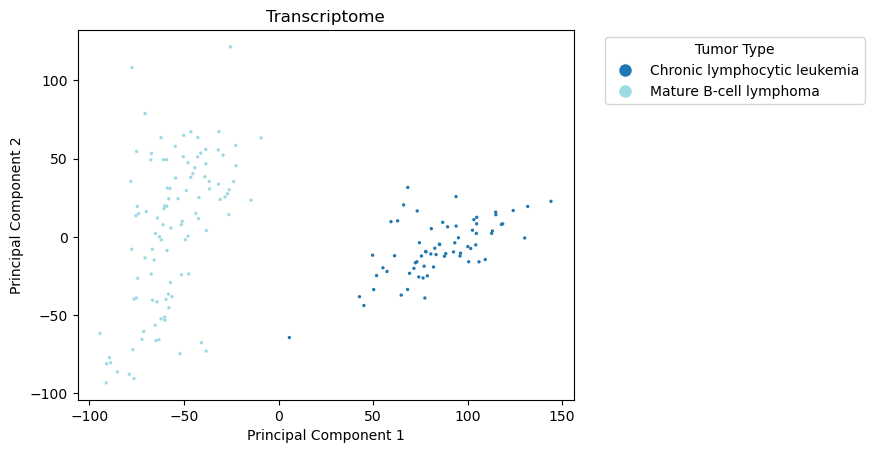

In [203]:
# Get the tumor type for each sample (each column)
labels = blood_expression_df.columns.map(tumortype_dict)
blood_label_integers = plot_PCA_withlabels(blood_proj_data, labels, 'Blood_PCA.png')

There is a clear separation between chronic lymphocitic leukemias and mature B-cell lymphomas. Now, we can train a perceptron using scikit-learn that can separate both groups. For this kind of classifier models it is useful to **standarize** the data as we saw for the dimensionality reduction algorithms, however, the output of the PCA is already standarized so both **training** and **test** dataset, which derive from the same standarize output, will have the same scale.

In [207]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Define the dependent and independent variables
## The labels are the two types of blood cancers we want to separate, encoded as 0s and 1s.
y = pd.DataFrame(blood_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(blood_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

The model is already trained with the training dataset, but before plotting the results on the test dataset we can define a function to conviniently visualize the decision boundary regions that arise from training the perceptron or other classifier models that we will see on this session.

In [244]:
def plot_decision_regions(X, y, classifier, resolution, test_idx=None):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = plt.get_cmap('Paired', len(markers))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1, c=cmap(idx), 
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx.any():
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black',
        alpha=0.2, linewidth=0.1, marker='o',
        s=55, label='test set')

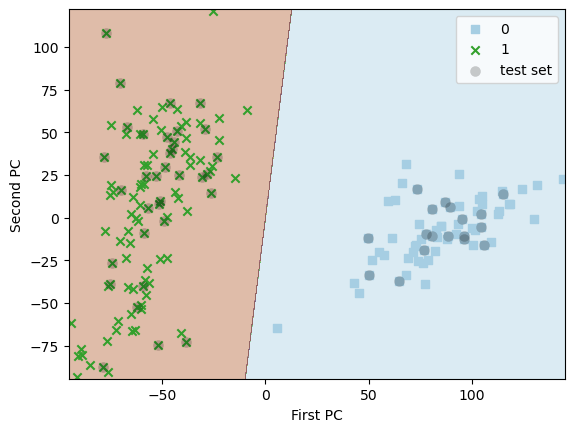

In [245]:
# Get the indexes into numpy format to mark the test dataset
test_idx = X_test.index.to_numpy()
# The function needs the independent and dependent dataframes to be passed as numpy arrays
X_numpy = X.to_numpy()
y_numpy = y[0].to_numpy()

# Call the function to generate the plot
plot_decision_regions(X_numpy, y_numpy, ppn, 0.1, test_idx)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Perceptron_blood.png'))
plt.show()

Since the two classes can be separated linearly, the perceptron works well on the classification task. This is reflected on the performance metrics.

In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def compute_evaluation_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Precision, Recall, F1 Score for binary classification
    if len(np.unique(y_test)) == 2:
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')

    # Precision, Recall, F1 Score for multi-class classification
    else:
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)
    
    
compute_evaluation_metrics(ppn, X_test, y_test)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[18  0]
 [ 0 34]]


But, it will work that well on a dataset with no clear lineal decision boundary? Let's try for instance with Kidney cancer, where there are three subtypes of adenocarcinomas depending on the affected cell.

In [246]:
# Generate a dictionary to translate the Specimen IDs to the histological subtype
subtype_tumortype_dict = dict(zip(histology_df.icgc_specimen_id, histology_df.histology_tier4))

# Get the specimensID of blood cancers
specimens_kidney = sample_df[sample_df['primary_location']=='Kidney']['icgc_specimen_id'].copy()

# Intersect with the available columns to find the blood cancer specimens with available expression
subset_specimens = list(set(expression_df.columns).intersection(set(specimens_kidney)))

# Filter the data to do the PCA only with blood cancer specimens
kidney_expression_df = expression_df[subset_specimens].copy()

In [247]:
# We preprocess the data with standarization
scaler2 = StandardScaler()
kidney_data = scaler2.fit_transform(kidney_expression_df.T)

# We perform the PCA
kidney_pca2D = PCA(n_components=2)
kidney_proj_data = kidney_pca2D.fit_transform(kidney_data)

# We can check the amount of variance explained by the two Principal components
print(kidney_pca2D.explained_variance_ratio_)

[0.18593706 0.09709004]


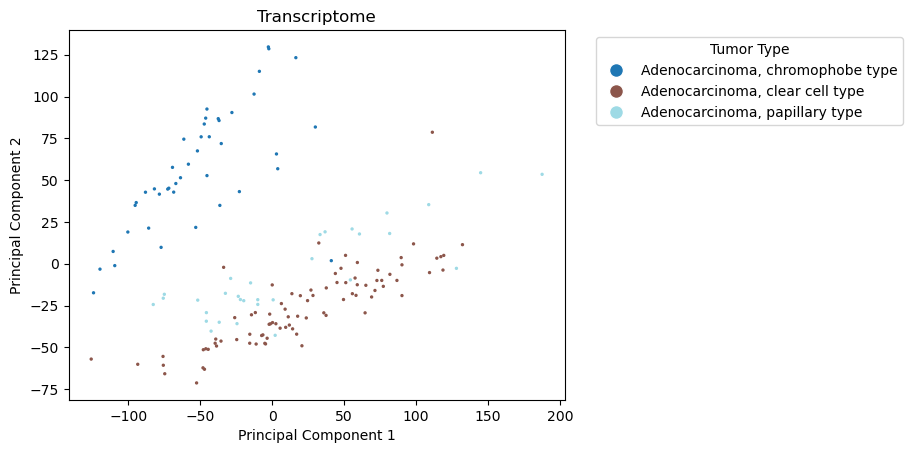

In [248]:
# Get the tumor type for each sample (each column)
labels = subset_expression_df.columns.map(subtype_tumortype_dict)
kidney_label_integers = plot_PCA_withlabels(subset_proj_data, labels, 'Kidney_PCA.png')

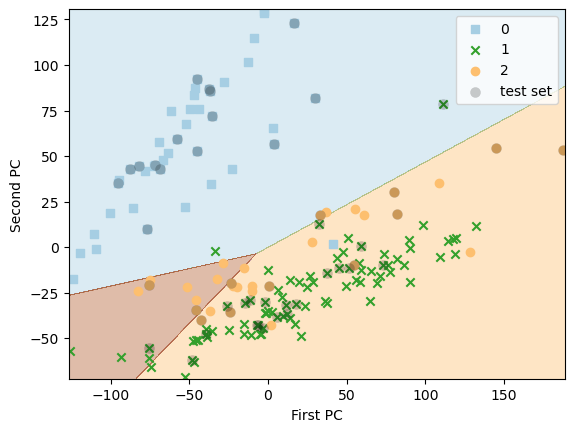

In [254]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), ppn, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Perceptron_kidney.png'))
plt.show()

In [250]:
# We check the metrics in this case
compute_evaluation_metrics(ppn, X_test, y_test)

Accuracy: 0.75
Precision: 0.74
Recall: 0.75
F1 Score: 0.70
Confusion Matrix:
[[15  0  0]
 [ 1 19  1]
 [ 1  9  2]]


### Logistic Regression

Logistic Regression is a popular statistical method used for binary classification tasks, although, similarly to the perceptron, it is possible to implement it on multi-class taks by dividing the problem in multiple binary classifiers of one vs the rest or **OvR** (in this case we have a **multinomial logistic classification**).

The logistic regression model works by transforming a linear combination of input features using a **logit function** (do not confuse with the **logistic or sigmoid function** which is the inverse) as follows:

$$P(Y) = \frac{1}{1 + e^{-z}}$$

where:
- $P(Y)$ is the probability of the target (dependent) variable.
- $e$ is the base of the natural logarithm.
- $z$ is the linear combination of input features and their corresponding weights: $z = β₀ + β₁x₁ + β₂x₂ + ... + β_nx_n$.
  
Hence, the logit function maps any real-valued number to the range [0, 1], which is crucial for interpreting the output as a probability, and thus, assign each element to a given class based on the ratio of probabilities. Then, once the model is trained, we can use the inverse **logistic or sigmoid function** to predict the probability that a certain sample belongs to a particular class given the input features.

<!-- Add an empty line here -->

[![Logit function](https://i.stack.imgur.com/WY61Z.png)](https://en.wikipedia.org/wiki/Logit)

<!-- Add an empty line here -->

On this setting, the linear combination of input features is related with the logarithm of the odds-ratio** (also known as **log-odds**) since from the logistic regression formula we can derive that:

$$logit(P(Y)) = ln(\frac{P(Y)}{1 - P(Y)}) = β₀ + β₁x₁ + β₂x₂ + ... + β_nx_n$$

The **odds-ratio**, expressed as $\frac{P(Y)}{1 - P(Y)}$, is the relationship of the probability of one event with respect to the opposite one (on a binary situation) and can be used as the association strength between two events. From the relative probabilities of belonging to once class vs others, a **unit step function or quantizer** chooses the class with the highest probability to provide that as output.

<!-- Add an empty line here -->

![Logistic classificator scheme](images/Logistic.png)

<!-- Add an empty line here -->


The **learning rule** here is the maximization of a **likelihood function** (from a simplified perspective, the algorithm finds the proper weights by maximizing a function that provides the **probability of observing the training data given the parameters of the model**, if you need more information look at the bibliography).

**Advantages:**
- Logistic regression provides **interpretable** results since the coefficients can be directly interpreted in terms of changes in log odds: it provides with probabilities during the classification.
- Training logistic regression models is computationally **efficient** and scales well to large datasets.

**Disadvantages:**
- A critical assumption is the **absence of extreme outliers** in the dataset, which distort the training (could be verified by calculating Cook’s distance (Di) to identify influential data points that may negatively affect the regression model).
- Logistic regression **assumes a linear relationship between the log-odds and the independent variables**, which translated into a linear decision boundary. This might not be suitable for datasets with complex, non-linear relationships between features (better use support vector machines or decision tress and derivates).
- Assumes little to no multicollinearity between explanatory variables.

Let's see how it works for both blood and kidney cancer examples.

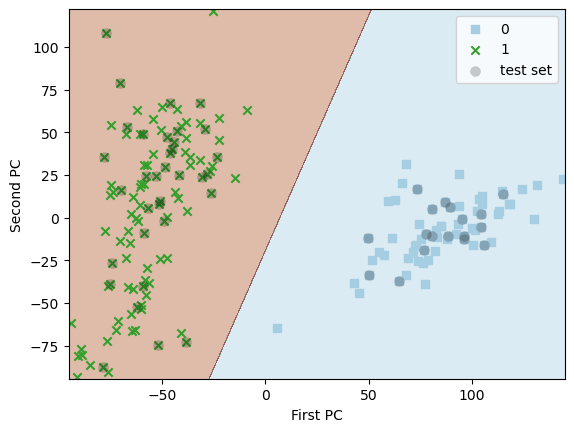

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[18  0]
 [ 0 34]]


In [257]:
from sklearn.linear_model import LogisticRegression

# Define the dependent and independent variables
## The labels are the two types of blood cancers we want to separate, encoded as 0s and 1s.
y = pd.DataFrame(blood_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(blood_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), lr, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(lr, X_test, y_test)

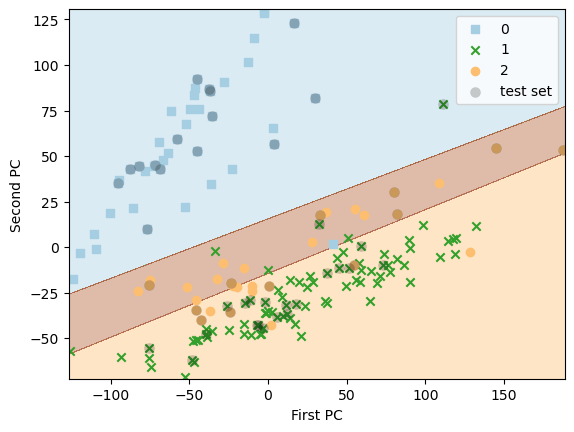

Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 Score: 0.85
Confusion Matrix:
[[15  0  0]
 [ 1 19  1]
 [ 0  5  7]]


In [258]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), lr, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(lr, X_test, y_test)

### Support Vector Machines (SVM)

Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks. SVM aims to find the optimal hyperplane that separates data points of different classes in feature space. The hyperplane is defined by:

$$f(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

where:
- $f(x)$ is the decision function.
- $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the coefficients (weights) to be learned.
- $x_1, x_2, ..., x_n$ are the input features.

In contrast with the perceptron, where the objective was to minimized misclassification errors, in SVMs the optimization objective is to **maximize the margin** (the **learning rule** of SVM), defined as the distance between the separating hyperplane (the decision boundary) and the training samples that are closest to this hyperplane, which are the so-called **support vectors** (the data points that lie closest to the decision boundary). This is illustrated in the following figure:

<!-- Add an empty line here -->

![Margin concept](images/Margin.png)

<!-- Add an empty line here -->

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error (the decision boundaries are less influenced by the training dataset) whereas models such as the perceptron with small margins are more prone to fall into **overitting** issues. However, as you might understand, this concept of **maximizing the margins** is therorethically suitable if there is an hyperplane that is able to separate all the training groups. But what about cases where that is impossible? How can we build a good enough model in this situation where margins are not that clear?

To assess that the algorithm takes into account a concept known as **soft-margin classification**, where an internal extra parameter called **slack variable** (see the bibliography for mathematical details) allows to relax the constrains for nonlinearly separable data to allow convergence of the optimization in the presence of misclassifications under the appropriate cost penalization. This is controlled by an **hyperparameter of the model C** where increasing values of C increases the bias and lowers the variance of the model to adjust for the **bias-variance** tradeoff:

<!-- Add an empty line here -->

![Regularization parameter C](images/ParamC.png)

<!-- Add an empty line here -->


**Advantages:**
- Effective in high-dimensional spaces.
- Can handle **linear and non-linear relationships** using different kernel functions.

<!-- Add an empty line here -->

![Non-linear relationships](images/Kernel.png)

<!-- Add an empty line here -->

- **Robust to overfitting**, especially in high-dimensional spaces. Thanks to the hyperparameter C.

**Disadvantages:**
- Training is more **computationally expensive** can be high for large datasets.
- SVMs are **sensitive to noise** present on the data. It is important to play with the hyperparameter C to adjust for that.

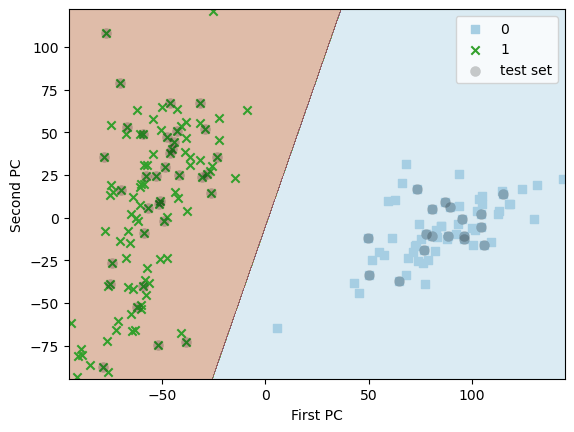

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[18  0]
 [ 0 34]]


In [259]:
from sklearn.svm import SVC

# Define the dependent and independent variables
## The labels are the two types of blood cancers we want to separate, encoded as 0s and 1s.
y = pd.DataFrame(blood_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(blood_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), svm, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'SVM_c1_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(svm, X_test, y_test)

Here the classifier works in a similar way to the simple perceptron that we trained at the start of this session. However, notice that the **decision boundary** now is optimized to maximize the margin between the two training sets and avoid overfitting. If we apply the same settings to train a model for the kidney cancer, where there is no clear linear separation, the performance is less optimal and more similar to the one obtained with the **logistic model**.

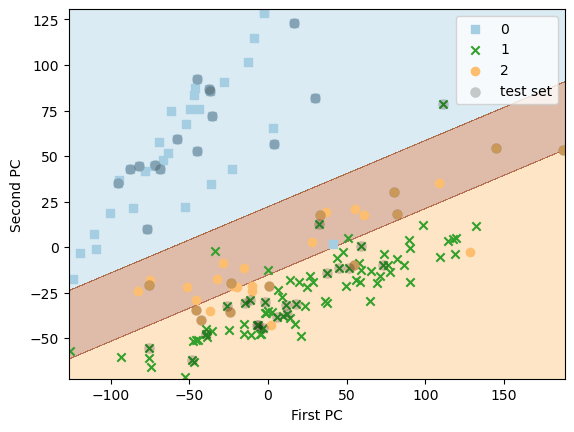

Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 Score: 0.85
Confusion Matrix:
[[15  0  0]
 [ 1 19  1]
 [ 0  5  7]]


In [260]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), svm, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(svm, X_test, y_test)

However, unlike the **logistic model** which cannot work with non-linear decision boundaries, on **SVM** we can use the kernel trick to solve non-linear classifications. This is the key aspect why SVM enjoy high popularity among machine learning practitioners.

To simplify, kernels can be interpreted as a similarity function between pairs of samples so we can model an "extra non-existent dimension" to allow for non-linear boundaries. One of the most popular **kernel functions** is the **Radial Basis Function (RBF) or Gaussian kernel**, which is the one we are going to implement in our example.

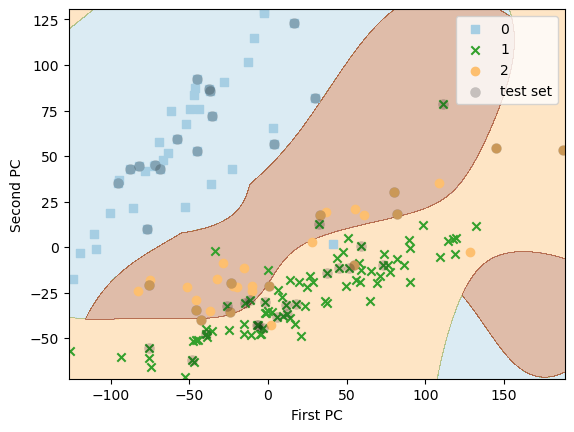

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Confusion Matrix:
[[15  0  0]
 [ 0 16  5]
 [ 0  5  7]]


In [269]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now let's simply change the kernel from linear to rbf
# We will also play with the C parameter to try to fit the data
svm = SVC(kernel='rbf', C=50, random_state=42)
svm.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), svm, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(svm, X_test, y_test)

For instance with a C hyperparameter of 50 we are forcing the **SVM** to try to fit better the model that tries to classify class 2 (the most difficult one to separate) even if we are incurring into some level of overfitting.

### Random Forest

To understand the Random Forest, first we need to understand the **Decision Trees**: a classic tree-like model used for classification based on multiple "decisions" based on several independent variables.

<!-- Add an empty line here -->

[![Decision trees](https://miro.medium.com/v2/resize:fit:1280/0*4QE-0kavxXfzF_bR.png)](https://en.wikipedia.org/wiki/Decision_tree)

<!-- Add an empty line here -->

Since each of these decision trees is considered a model per se, a **Random forest** which is a model arising from the combination of multiple decision trees, it is an **ensemble method**, that is, a machine learning model composed of multiple small models with the idea of outperforming the accuracy obtained from individual models alone.

Therefore, the algorithm behind **Random forest** models involves the recursive splitting of the dataset based on the features that best separate the data into distinct classes or groups. The goal is to create decision rules that efficiently partition the data by randomly sampling of the features that best separate the data into distinct classes or groups. Therefore, the steps for a random forest classifier are:

1. **Build Decision Trees:** Create multiple decision trees using bootstrapped samples and random subsets of features. Hence, each building block of the random forest is trained on a random subset of the training data and features, allowing for diversity.

2. **Aggregate Predictions:** Combine the predictions of individual trees through voting or averaging.

3. **Model Evaluation:** Assess the model's performance using metrics like accuracy or F1 score.


<!-- Add an empty line here -->

[![Random forest classifier](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)](https://en.wikipedia.org/wiki/Random_forest)

<!-- Add an empty line here -->

Random forest **can handle both classification and regression taks**. The **learning rule** of this classifier is to maximize the "discriminative power" for classification taks and the error distance for regression tasks. This is commonly evaluated with the **Gini impurity** metric for classification tasks or the **mean squared error** for regression tasks.

**Advantages:**
- Random Forests reduce are **robust to overfitting** by averaging the predictions of multiple trees.
- Capable of **capturing complex, non-linear relationships** in the data.
- Provides a measure of feature importance such as the **Gini impurity**.

**Disadvantages:**
- Random Forests **cannot be easily interpreted**, often considered as "black-box" models
- Can be **computationally expensive** for large datasets and many trees.

For the following examples instead of the our multiomics dataset, we will work with a mock dataset that is already present on the scikit-learn package, which will be better to exemplify the largest power of decision trees: working with high number of features and evaluate the importance of each of them in the classification power. This is the dataset that will be used for the first deadline of delivery exercises. First we will build a simple decision tree classifier.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
y = iris['target']

print(iris.keys())
print('')
print('feature names:', iris['feature_names'])
print('target names:', iris['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


[Text(0.375, 0.9285714285714286, 'x[3] <= -0.59\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.25, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'x[2] <= 0.577\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.25, 0.6428571428571429, 'x[3] <= 0.595\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.6428571428571429, 'x[2] <= 0.749\ngini = 0.169\nsamples = 43\nvalue = [0, 4, 39]'),
 Text(0.625, 0.5, 'x[1] <= -0.004\ngini = 0.48\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(0.5, 0.35714285714285715, 'x[3] <= 0.726\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.375, 0.21428571428571427, 'x[1] <= -1.616\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.07142857142857142, 'gi

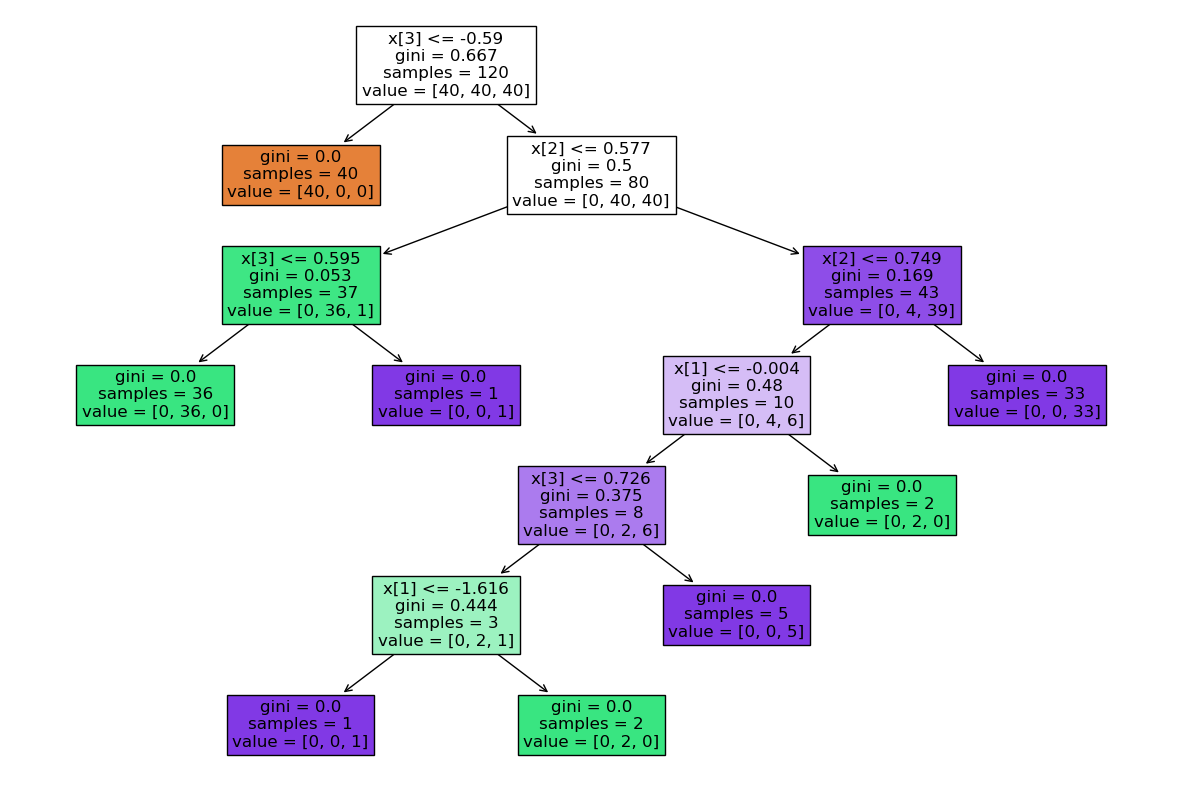

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

plt.figure(figsize=(15,10))
plot_tree(decision_tree, fontsize=12, filled=True)

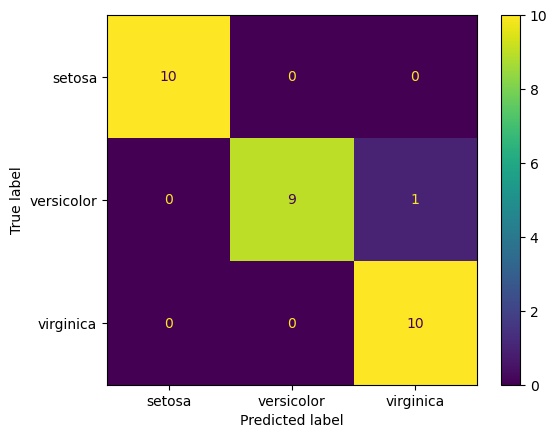

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris['target_names'])
disp.plot()

Okay, now instead of an individual decision tree we will train a random forest classifier with the same dataset.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.9666666666666667
0.9665831244778613


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importances: [0.09216666 0.02975732 0.46328393 0.41479208]


Text(0, 0.5, 'Relative feature importance')

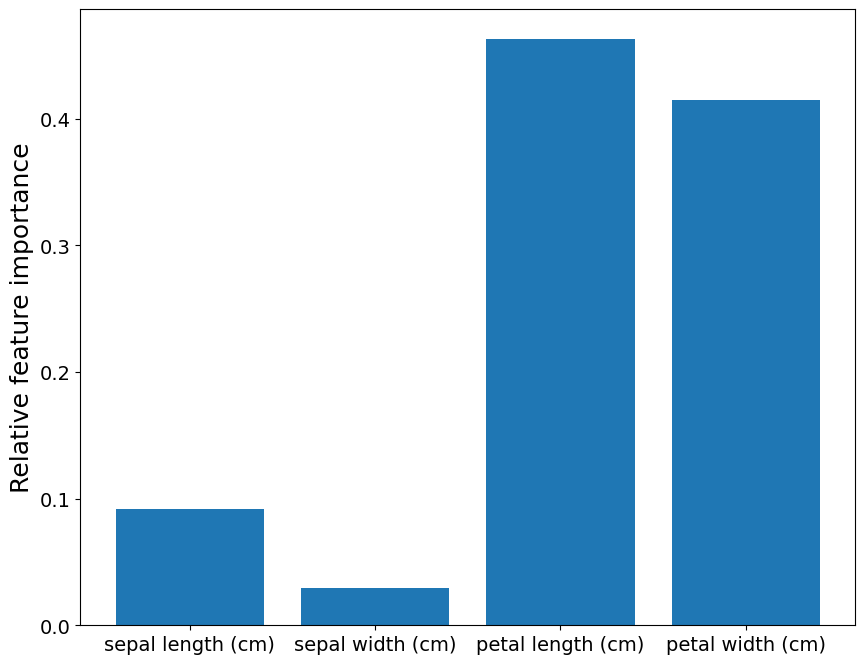

In [12]:
print(iris['feature_names'])
print('feature importances:', random_forest.feature_importances_)
plt.figure(figsize=(10,8))
plt.bar(iris['feature_names'], random_forest.feature_importances_)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Relative feature importance', fontsize=18)

The random forest classifier, by building random decision trees from the data is able to better grasp the relative importance of each of the features in the classification of the different classes.